## Living Costs Food Survey: Data Cleaning

This script contains the following:
#### 01. Import Libraries and Assign Path
#### 02. Importing and Checking lcf_csv
#### 03. Cleaning lcf.csv
##### Change data types, check for null values and mixed-type data 
##### Check for duplicates and unique values
#### 04. Descriptive Statistics
##### No. of people
##### Food categories
##### Income and Expenditure
#### 05. Removing Outliers
##### Remove the six outliers identified in the descriptive statistics section.
##### Remove the entries without a food cost i.e. didn't keep a food diary
#### 06. Basic descriptive statistics on cleaned dataframe
#### 07. Exporting Cleaned Dataframe
---

## 01. Importing Libraries and Assign Path

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign the main project folder path to the variable path
path = r'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'

In [3]:
path

'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'

---

## 02. Importing and Checking lcf.csv

In [4]:
# Use the os.path.join() function to import the lcf.csv file as pandas a dataframe without the index column and view first five rows
df_lcf = pd.read_csv(os.path.join(path, '02_Data', '02_2_Prepared_Data', 'lcf.csv'), index_col = False)
df_lcf.head()

,Unnamed: 0,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,...,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year
0,0,1,0,0,0,0,1,0,0,0,...,38.675,0.000,38.675,98.278236,0.000,98.278236,Rural,NaN,25.550684,2016
1,1,2,0,0,1,3,1,0,0,0,...,60.670,0.800,61.470,437.867812,3.800,441.667812,Urban,NaN,30.114910,2015
2,2,3,0,0,0,0,2,0,0,0,...,127.435,0.000,127.435,802.527055,0.000,802.527055,Urban,NaN,21.164147,2016
3,3,4,1,0,1,1,0,0,0,0,...,48.500,1.000,49.500,580.569766,1.000,581.569766,Urban,NaN,15.847543,2015
4,4,5,0,0,1,2,0,0,0,0,...,135.770,23.475,164.470,594.895641,38.465,638.585641,Urban,NaN,15.858930,2015


In [5]:
# Drop the Unamed: 0 column
df_lcf = df_lcf.drop(columns = ['Unnamed: 0'])

In [6]:
# View the first five rows
df_lcf.head()

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year
0,1,0,0,0,0,1,0,0,0,1,...,38.675,0.000,38.675,98.278236,0.000,98.278236,Rural,NaN,25.550684,2016
1,2,0,0,1,3,1,0,0,0,5,...,60.670,0.800,61.470,437.867812,3.800,441.667812,Urban,NaN,30.114910,2015
2,3,0,0,0,0,2,0,0,0,2,...,127.435,0.000,127.435,802.527055,0.000,802.527055,Urban,NaN,21.164147,2016
3,4,1,0,1,1,0,0,0,0,3,...,48.500,1.000,49.500,580.569766,1.000,581.569766,Urban,NaN,15.847543,2015
4,5,0,0,1,2,0,0,0,0,3,...,135.770,23.475,164.470,594.895641,38.465,638.585641,Urban,NaN,15.858930,2015


In [7]:
# check bottom five rows of the dataframe df_lcf
df_lcf.tail()

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year
26266,26267,0,0,0,0,0,0,0,2,2,...,98.940,0.0,98.940,430.703816,0.0,430.703816,Urban,NaN,20.564904,2019
26267,26268,0,0,0,0,0,0,1,0,1,...,61.105,0.0,61.105,326.996012,0.0,326.996012,Urban,NaN,21.733643,2019
26268,26269,0,0,0,0,0,2,0,0,2,...,82.290,0.0,82.290,574.437456,0.0,574.437456,Urban,NaN,23.384263,2019
26269,26270,0,0,0,1,0,0,0,0,1,...,16.250,0.0,16.250,1535.124346,0.0,1535.124346,Urban,NaN,38.794210,2019
26270,26271,0,0,0,0,2,0,0,0,2,...,77.680,0.0,77.680,401.611044,0.0,401.611044,Urban,NaN,25.608355,2020


In [8]:
# dataframe information
df_lcf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_id                 26271 non-null  int64  
 1   children_0-2              26271 non-null  int64  
 2   children_2-5              26271 non-null  int64  
 3   children_5-18             26271 non-null  int64  
 4   adults_18-45              26271 non-null  int64  
 5   adults_45-60              26271 non-null  int64  
 6   adults_60-65              26271 non-null  int64  
 7   adults_65-70              26271 non-null  int64  
 8   adults_70+                26271 non-null  int64  
 9   no_people                 26271 non-null  int64  
 10  household_type            26271 non-null  object 
 11  quarter                   26271 non-null  object 
 12  rice                      26271 non-null  float64
 13  bread                     26271 non-null  float64
 14  buns_b

In [9]:
# Check the dataframe columns
df_lcf.columns

Index(['unique_id', 'children_0-2', 'children_2-5', 'children_5-18',
       'adults_18-45', 'adults_45-60', 'adults_60-65', 'adults_65-70',
       'adults_70+', 'no_people', 'household_type', 'quarter', 'rice', 'bread',
       'buns_biscuits', 'pasta', 'cakes_puddings', 'pastry',
       'other_bread_cereal', 'beef', 'pork', 'lamb', 'poultry', 'sausages',
       'bacon_ham', 'offal_pate', 'processed_meat', 'meat', 'fish', 'seafood',
       'preserved_seafood', 'processed_fish', 'whole_milk', 'low_milk',
       'preserved_milk', 'yoghurt', 'cheese', 'other_milk', 'eggs', 'butter',
       'margarine', 'peanut_butter', 'olive_oil', 'oils', 'animal_fats',
       'citrus_fruit', 'bananas', 'apples', 'pears', 'stone_fruits', 'berries',
       'fruits', 'dried_fruit_nuts', 'preserved_fruit', 'fresh_veg', 'cabbage',
       'veg', 'root_veg', 'dried_veg', 'preserved_veg', 'potatoes',
       'tuber_veg', 'sugar', 'jam', 'chocolate', 'confectionary', 'ice_cream',
       'sugar_prod', 'sauces', 'co

In [10]:
# Check the dataframe shape
df_lcf.shape

(26271, 90)

In [11]:
# Check the dataframe for empty rows and drop them
df1 = df_lcf.dropna(how='all')
df1.shape

(26271, 90)

In [12]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_id                 26271 non-null  int64  
 1   children_0-2              26271 non-null  int64  
 2   children_2-5              26271 non-null  int64  
 3   children_5-18             26271 non-null  int64  
 4   adults_18-45              26271 non-null  int64  
 5   adults_45-60              26271 non-null  int64  
 6   adults_60-65              26271 non-null  int64  
 7   adults_65-70              26271 non-null  int64  
 8   adults_70+                26271 non-null  int64  
 9   no_people                 26271 non-null  int64  
 10  household_type            26271 non-null  object 
 11  quarter                   26271 non-null  object 
 12  rice                      26271 non-null  float64
 13  bread                     26271 non-null  float64
 14  buns_b

No empty rows.

In [13]:
# Delete the dataframe df1 and free up memory
del df1
gc.collect()

0

---

## 03. Cleaning lcf.csv

### Change data types, check for null values and mixed-type data 

In [14]:
# Count the values in each column
df_lcf.count()

unique_id            26271
children_0-2         26271
children_2-5         26271
children_5-18        26271
adults_18-45         26271
                     ...  
total_expenditure    26271
eng_rural_urb        21452
scot_rural_urb        3098
quarterly_weight     26271
year                 26271
Length: 90, dtype: int64

In [15]:
# Count NaN values in the dataframe
df_lcf.isnull().sum()

unique_id                0
children_0-2             0
children_2-5             0
children_5-18            0
adults_18-45             0
                     ...  
total_expenditure        0
eng_rural_urb         4819
scot_rural_urb       23173
quarterly_weight         0
year                     0
Length: 90, dtype: int64

The data set contains nulls for at least two of the variables eng-rural_urb and scot_rural_urb.

In [16]:
# Check for mixed-type data
for col in df_lcf.columns.tolist():
  weird = (df_lcf[[col]].applymap(type) != df_lcf[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_lcf[weird]) > 0:
    print (col)

eng_rural_urb
scot_rural_urb


In [17]:
# Change the mixed-type variables to string and check the types
df_lcf = df_lcf.astype({'eng_rural_urb': str, 'scot_rural_urb': str})
df_lcf.dtypes

unique_id              int64
children_0-2           int64
children_2-5           int64
children_5-18          int64
adults_18-45           int64
                      ...   
total_expenditure    float64
eng_rural_urb         object
scot_rural_urb        object
quarterly_weight     float64
year                   int64
Length: 90, dtype: object

In [18]:
# Recheck for mixed-type data
for col in df_lcf.columns.tolist():
  weird = (df_lcf[[col]].applymap(type) != df_lcf[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_lcf[weird]) > 0:
    print (col)

No mixed data.

### Check for duplicates and unique values

In [19]:
# Check for duplicates in the df_lcf dataframe
df_lcf_dups = df_lcf[df_lcf.duplicated()]
df_lcf_dups

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year


There are no duplicates in the df_lcf dataframe.

#### Check for Unique values

In [20]:
# Count the unique values in each column
df_lcf.nunique()

unique_id            26271
children_0-2             4
children_2-5             4
children_5-18            8
adults_18-45             9
                     ...  
total_expenditure    26254
eng_rural_urb            3
scot_rural_urb           3
quarterly_weight     16524
year                     6
Length: 90, dtype: int64

##### No. of people, Household and Quarter

In [21]:
# check the 'children_0-2' column
df_lcf['children_0-2'].value_counts(dropna = False)

0    24745
1     1472
2       52
3        2
Name: children_0-2, dtype: int64

In [22]:
# check the 'children_2-5' column
df_lcf['children_2-5'].value_counts(dropna = False)

0    24084
1     1964
2      217
3        6
Name: children_2-5, dtype: int64

In [23]:
# check the 'children_5-18' column
df_lcf['children_5-18'].value_counts(dropna = False)

0    20273
1     3081
2     2259
3      520
4      113
5       19
6        5
7        1
Name: children_5-18, dtype: int64

In [24]:
# check the 'adults_18-45' column
df_lcf['adults_18-45'].value_counts(dropna = False)

0    14230
2     6019
1     5526
3      372
4       88
5       24
6        7
7        3
8        2
Name: adults_18-45, dtype: int64

In [25]:
# check the 'adults_45-60' column
df_lcf['adults_45-60'].value_counts(dropna = False)

0    17216
1     5500
2     3538
3       16
4        1
Name: adults_45-60, dtype: int64

In [26]:
# check the 'adults_60-65' column
df_lcf['adults_60-65'].value_counts(dropna = False)

0    22868
1     2745
2      656
3        2
Name: adults_60-65, dtype: int64

In [27]:
# check the 'adults_465-70' column
df_lcf['adults_65-70'].value_counts(dropna = False)

0    22971
1     2622
2      678
Name: adults_65-70, dtype: int64

In [28]:
# check the 'adults_70+' column
df_lcf['adults_70+'].value_counts(dropna = False)

0    20246
1     4011
2     2011
3        3
Name: adults_70+, dtype: int64

In [29]:
# check the 'no_people' column
df_lcf['no_people'].value_counts(dropna = False)

2    10048
1     7131
3     4070
4     3496
5     1068
6      322
7      103
8       28
9        5
Name: no_people, dtype: int64

In [30]:
# check the 'household_type' column
df_lcf['household_type'].value_counts(dropna = False)

Index        24596
Pensioner     1275
Wealthy        400
Name: household_type, dtype: int64

In [31]:
# check the 'quarter' column
df_lcf['quarter'].value_counts(dropna = False)

October to December    6765
July to September      6548
January to March       6511
April to June          6447
Name: quarter, dtype: int64

##### Food Categories

###### Carbohydrates

In [32]:
# check the 'rice' column
df_lcf['rice'].value_counts(dropna = False)

0.000    18398
0.500      525
1.000      474
1.500      238
0.750      224
         ...  
3.745        1
5.090        1
2.280        1
3.490        1
2.930        1
Name: rice, Length: 901, dtype: int64

In [33]:
# check the 'bread' column
df_lcf['bread'].value_counts(dropna = False)

0.000     1838
0.500      447
1.000      332
1.500      236
0.750      181
          ... 
12.920       1
11.120       1
8.630        1
8.215        1
10.220       1
Name: bread, Length: 2070, dtype: int64

In [34]:
# check the 'buns_biscuits' column
df_lcf['buns_biscuits'].value_counts(dropna = False)

0.000     4286
0.500      871
1.000      560
1.500      335
0.750      238
          ... 
10.680       1
13.515       1
9.975        1
8.765        1
10.255       1
Name: buns_biscuits, Length: 2219, dtype: int64

In [35]:
# check the 'pasta' column
df_lcf['pasta'].value_counts(dropna = False)

0.000     15217
0.500       867
1.000       401
0.750       252
0.225       207
          ...  
3.255         1
16.500        1
3.265         1
9.765         1
2.835         1
Name: pasta, Length: 834, dtype: int64

In [36]:
# check the 'cakes_puddings' column
df_lcf['cakes_puddings'].value_counts(dropna = False)

0.000     9388
0.500     1041
1.000      639
1.500      349
0.750      317
          ... 
7.415        1
7.910        1
12.620       1
6.630        1
6.235        1
Name: cakes_puddings, Length: 1881, dtype: int64

In [37]:
# check the 'pastry' column
df_lcf['pastry'].value_counts(dropna = False)

0.000     15678
1.000       566
0.500       421
1.500       409
2.000       377
          ...  
2.105         1
9.755         1
9.715         1
3.160         1
11.660        1
Name: pastry, Length: 1331, dtype: int64

In [38]:
# check the 'cakes_puddings' column
df_lcf['other_bread_cereal'].value_counts(dropna = False)

0.000     4768
1.000      587
0.500      576
1.500      337
2.000      244
          ... 
10.150       1
10.840       1
10.695       1
8.655        1
8.535        1
Name: other_bread_cereal, Length: 2224, dtype: int64

###### Meat

In [39]:
# check the 'beef' column
df_lcf['beef'].value_counts(dropna = False)

0.000     14408
2.000       296
2.500       218
1.500       195
3.500       163
          ...  
10.125        1
6.360         1
8.305         1
14.155        1
15.415        1
Name: beef, Length: 2470, dtype: int64

In [40]:
# check the 'pork' column
df_lcf['pork'].value_counts(dropna = False)

0.000    20661
1.500      205
2.000      158
2.500      151
1.750      116
         ...  
4.910        1
6.350        1
5.015        1
9.710        1
7.120        1
Name: pork, Length: 1263, dtype: int64

In [41]:
# check the 'cakes_puddings' column
df_lcf['lamb'].value_counts(dropna = False)

0.000     22880
2.000       156
2.500        94
1.645        62
3.500        57
          ...  
4.075         1
12.070        1
3.345         1
2.765         1
31.250        1
Name: lamb, Length: 1314, dtype: int64

In [42]:
# check the 'cakes_puddings' column
df_lcf['poultry'].value_counts(dropna = False)

0.000     12065
2.000       418
1.500       361
2.500       353
5.000       213
          ...  
14.820        1
25.460        1
31.710        1
2.815         1
11.720        1
Name: poultry, Length: 2417, dtype: int64

In [43]:
# check the 'sausages' column
df_lcf['sausages'].value_counts(dropna = False)

0.000     14556
1.000       809
1.250       445
0.500       445
1.500       393
          ...  
3.055         1
12.045        1
5.700         1
4.550         1
5.505         1
Name: sausages, Length: 1351, dtype: int64

In [44]:
# check the 'bacon_ham' column
df_lcf['bacon_ham'].value_counts(dropna = False)

0.000     15001
1.000       701
2.000       464
1.500       435
0.750       323
          ...  
5.135         1
3.830         1
13.585        1
5.910         1
5.200         1
Name: bacon_ham, Length: 1323, dtype: int64

In [45]:
# check the 'offal_pate' column
df_lcf['offal_pate'].value_counts(dropna = False)

0.000    23268
0.500      322
0.225      128
0.300      123
0.245       88
         ...  
1.090        1
3.530        1
3.450        1
8.335        1
1.395        1
Name: offal_pate, Length: 486, dtype: int64

In [46]:
# check the 'processed_meat' column
df_lcf['processed_meat'].value_counts(dropna = False)

0.000     3974
1.000      333
1.500      272
2.000      225
0.500      214
          ... 
22.905       1
31.975       1
15.490       1
13.695       1
26.630       1
Name: processed_meat, Length: 4074, dtype: int64

In [47]:
# check the 'meat' column
df_lcf['meat'].value_counts(dropna = False)

0.000     26129
2.500         9
2.000         8
0.995         6
5.000         6
          ...  
0.890         1
4.250         1
11.495        1
0.940         1
1.870         1
Name: meat, Length: 89, dtype: int64

###### Seafood

In [48]:
# check the 'fish' column
df_lcf['fish'].value_counts(dropna = False)

0.000    19771
2.000      226
1.500      195
1.750      116
5.000      110
         ...  
4.220        1
4.155        1
0.885        1
5.845        1
5.975        1
Name: fish, Length: 1609, dtype: int64

In [49]:
# check the 'seafood' column
df_lcf['seafood'].value_counts(dropna = False)

0.000     22982
1.500       226
1.250       119
2.000       110
1.750       105
          ...  
12.750        1
4.030         1
3.485         1
0.475         1
7.290         1
Name: seafood, Length: 789, dtype: int64

In [50]:
# check the 'preserved_seafood' column
df_lcf['preserved_seafood'].value_counts(dropna = False)

0.000    22816
1.500      113
1.495      104
2.000       97
0.745       75
         ...  
6.225        1
1.485        1
4.650        1
1.755        1
0.805        1
Name: preserved_seafood, Length: 922, dtype: int64

In [51]:
# check the 'processed_fish' column
df_lcf['processed_fish'].value_counts(dropna = False)

0.000     12809
1.500       536
1.000       529
2.000       340
0.500       303
          ...  
6.020         1
14.320        1
1.930         1
9.535         1
3.985         1
Name: processed_fish, Length: 1678, dtype: int64

###### Dairy, Eggs, Fats, Peanut Butter and Oils

In [52]:
# check the 'whole_milk' column
df_lcf['whole_milk'].value_counts(dropna = False)

0.000    19554
0.500      238
1.000      174
0.545      172
1.500      123
         ...  
7.000        1
2.915        1
6.745        1
4.860        1
4.605        1
Name: whole_milk, Length: 1009, dtype: int64

In [53]:
# check the 'low_milk' column
df_lcf['low_milk'].value_counts(dropna = False)

0.000     6085
0.500      487
1.000      433
1.500      364
0.545      312
          ... 
10.395       1
6.245        1
12.520       1
10.140       1
5.560        1
Name: low_milk, Length: 1551, dtype: int64

In [54]:
# check the 'preserved_milk' column
df_lcf['preserved_milk'].value_counts(dropna = False)

0.000     24637
0.500        88
0.245        47
0.490        43
0.325        39
          ...  
16.925        1
2.065         1
13.220        1
0.520         1
6.800         1
Name: preserved_milk, Length: 543, dtype: int64

In [55]:
# check the 'yoghurt' column
df_lcf['yoghurt'].value_counts(dropna = False)

0.000    10848
1.000     1054
0.500      842
1.500      572
2.000      410
         ...  
7.060        1
9.665        1
7.100        1
7.700        1
4.065        1
Name: yoghurt, Length: 1491, dtype: int64

In [56]:
# check the 'cheese' column
df_lcf['cheese'].value_counts(dropna = False)

0.000     7031
1.000      853
1.500      543
1.250      411
0.500      396
          ... 
5.205        1
6.620        1
11.050       1
9.085        1
10.050       1
Name: cheese, Length: 1982, dtype: int64

In [57]:
# check the 'other_milk' column
df_lcf['other_milk'].value_counts(dropna = False)

0.000     10557
0.500       898
1.000       647
1.500       326
0.750       260
          ...  
10.215        1
7.840         1
7.365         1
3.720         1
6.495         1
Name: other_milk, Length: 1448, dtype: int64

In [58]:
# check the 'eggs' column
df_lcf['eggs'].value_counts(dropna = False)

0.000    10584
0.500      944
0.445      629
1.000      619
0.750      490
         ...  
3.265        1
4.300        1
2.555        1
2.185        1
6.500        1
Name: eggs, Length: 895, dtype: int64

In [59]:
# check the 'butter' column
df_lcf['butter'].value_counts(dropna = False)

0.000     18234
1.000       373
0.750       271
0.745       241
0.500       230
          ...  
10.500        1
4.435         1
4.325         1
13.440        1
4.940         1
Name: butter, Length: 857, dtype: int64

In [60]:
# check the 'margarine' column
df_lcf['margarine'].value_counts(dropna = False)

0.000    15997
0.500     1255
1.000      765
1.500      387
0.750      265
         ...  
2.405        1
2.155        1
6.880        1
3.825        1
3.195        1
Name: margarine, Length: 786, dtype: int64

In [61]:
# check the peanut_butter' column
df_lcf['peanut_butter'].value_counts(dropna = False)

0.000    24692
1.000      108
0.650       91
0.495       88
1.250       71
         ...  
0.580        1
2.215        1
4.490        1
2.945        1
0.170        1
Name: peanut_butter, Length: 312, dtype: int64

In [62]:
# check the 'olive_oil' column
df_lcf['olive_oil'].value_counts(dropna = False)

0.000    24133
1.000      129
1.495      103
1.095      101
1.500       85
         ...  
2.280        1
7.950        1
1.325        1
5.370        1
0.150        1
Name: olive_oil, Length: 433, dtype: int64

In [63]:
# check the 'oils' column
df_lcf['oils'].value_counts(dropna = False)

0.000    22805
0.545      300
0.750      198
0.600      156
1.000      156
         ...  
1.585        1
0.065        1
0.355        1
2.850        1
2.235        1
Name: oils, Length: 474, dtype: int64

In [64]:
# check the 'animal_fats' column
df_lcf['animal_fats'].value_counts(dropna = False)

0.000    25367
0.195      117
0.550       33
0.500       31
0.750       31
         ...  
1.320        1
0.525        1
0.640        1
1.045        1
2.145        1
Name: animal_fats, Length: 203, dtype: int64

###### Fruit

In [65]:
# check the 'citrus_fruit' column
df_lcf['citrus_fruit'].value_counts(dropna = False)

0.000     13518
0.500       682
0.750       421
1.000       346
0.625       267
          ...  
8.125         1
3.095         1
4.280         1
12.955        1
5.925         1
Name: citrus_fruit, Length: 1008, dtype: int64

In [66]:
# check the 'bananas' column
df_lcf['bananas'].value_counts(dropna = False)

0.000     9907
0.500      432
0.450      405
0.400      283
0.340      227
          ... 
4.035        1
2.870        1
3.045        1
3.690        1
15.500       1
Name: bananas, Length: 695, dtype: int64

In [67]:
# check the 'apples' column
df_lcf['apples'].value_counts(dropna = False)

0.000     14733
0.500       568
0.750       519
1.000       491
0.800       332
          ...  
5.455         1
3.885         1
6.225         1
7.150         1
12.360        1
Name: apples, Length: 972, dtype: int64

In [68]:
# check the 'pears' column
df_lcf['pears'].value_counts(dropna = False)

0.000    21873
0.500      352
0.750      262
1.000      205
0.395      102
         ...  
2.055        1
3.235        1
5.840        1
3.400        1
5.000        1
Name: pears, Length: 516, dtype: int64

In [69]:
# check the 'stone_fruits' column
df_lcf['stone_fruits'].value_counts(dropna = False)

0.000     16979
0.500       505
1.000       386
0.750       224
1.500       166
          ...  
14.585        1
3.690         1
7.515         1
9.645         1
11.125        1
Name: stone_fruits, Length: 1186, dtype: int64

In [70]:
# check the 'berries' column
df_lcf['berries'].value_counts(dropna = False)

0.000     11584
1.000      1270
2.000       541
1.500       440
0.750       358
          ...  
7.830         1
1.060         1
5.770         1
7.915         1
12.700        1
Name: berries, Length: 1899, dtype: int64

In [71]:
# check the 'fruits' column
df_lcf['fruits'].value_counts(dropna = False)

0.000    18157
0.500      580
1.000      542
0.750      255
1.500      234
         ...  
5.020        1
4.185        1
2.930        1
9.040        1
3.695        1
Name: fruits, Length: 983, dtype: int64

In [72]:
# check the 'dried_fruit_nuts' column
df_lcf['dried_fruit_nuts'].value_counts(dropna = False)

0.000    16630
0.500      349
1.000      280
1.500      195
0.750      174
         ...  
5.895        1
8.845        1
6.025        1
5.175        1
0.170        1
Name: dried_fruit_nuts, Length: 1534, dtype: int64

In [73]:
# check the 'preserved_fruit' column
df_lcf['preserved_fruit'].value_counts(dropna = False)

0.000    22086
0.500      215
1.000      140
0.750      136
0.375      114
         ...  
2.060        1
2.325        1
2.320        1
4.915        1
3.995        1
Name: preserved_fruit, Length: 579, dtype: int64

###### Vegetables

In [74]:
# check the 'fresh_veg' column
df_lcf['fresh_veg'].value_counts(dropna = False)

0.000    9391
0.500     943
1.000     376
0.750     283
0.250     237
         ... 
4.955       1
4.810       1
6.590       1
7.475       1
8.185       1
Name: fresh_veg, Length: 1351, dtype: int64

In [75]:
# check the 'cabbage' column
df_lcf['cabbage'].value_counts(dropna = False)

0.000    14213
0.500      788
0.245      242
0.250      241
0.275      224
         ...  
3.810        1
2.485        1
2.945        1
3.915        1
3.230        1
Name: cabbage, Length: 765, dtype: int64

In [76]:
# check the 'veg' column
df_lcf['veg'].value_counts(dropna = False)

0.000     6396
0.500      542
0.750      257
1.000      252
0.345      211
          ... 
6.510        1
8.110        1
13.625       1
11.680       1
6.925        1
Name: veg, Length: 1668, dtype: int64

In [77]:
# check the 'root_veg' column
df_lcf['root_veg'].value_counts(dropna = False)

0.000     5120
0.500      513
1.000      245
0.750      206
0.450      151
          ... 
32.190       1
6.970        1
12.115       1
5.935        1
7.405        1
Name: root_veg, Length: 1538, dtype: int64

In [78]:
# check the 'dried_veg' column
df_lcf['dried_veg'].value_counts(dropna = False)

0.000    24851
0.575       96
0.500       58
1.000       54
0.750       48
         ...  
0.270        1
1.700        1
0.920        1
2.575        1
6.850        1
Name: dried_veg, Length: 339, dtype: int64

In [79]:
# check the 'preserved_veg' column
df_lcf['preserved_veg'].value_counts(dropna = False)

0.000     6559
0.500      611
1.000      533
0.750      252
1.500      228
          ... 
14.170       1
15.275       1
6.975        1
5.440        1
9.780        1
Name: preserved_veg, Length: 1957, dtype: int64

In [80]:
# check the 'potatoes' column
df_lcf['potatoes'].value_counts(dropna = False)

0.000    10010
0.500      998
1.000      987
0.750      500
1.500      285
         ...  
3.735        1
6.050        1
4.840        1
2.860        1
3.555        1
Name: potatoes, Length: 996, dtype: int64

In [81]:
# check the 'tuber_veg' column
df_lcf['tuber_veg'].value_counts(dropna = False)

0.000     7094
0.500     1031
1.000      811
1.500      479
0.750      379
          ... 
6.810        1
10.795       1
10.240       1
6.975        1
13.605       1
Name: tuber_veg, Length: 1774, dtype: int64

###### Sugar and Confectionary

In [82]:
# check the 'sugar' column
df_lcf['sugar'].value_counts(dropna = False)

0.000    19519
0.295      406
0.500      357
0.345      342
0.325      258
         ...  
4.020        1
0.705        1
5.050        1
2.040        1
6.250        1
Name: sugar, Length: 576, dtype: int64

In [83]:
# check the 'jam' column
df_lcf['jam'].value_counts(dropna = False)

0.000     19084
0.500       424
1.000       298
0.375       267
0.750       225
          ...  
3.335         1
4.995         1
9.250         1
4.810         1
15.475        1
Name: jam, Length: 758, dtype: int64

In [84]:
# check the 'chocolate' column
df_lcf['chocolate'].value_counts(dropna = False)

0.000     8941
0.500     1369
1.000      957
1.500      606
2.000      480
          ... 
8.725        1
10.935       1
28.765       1
14.650       1
7.095        1
Name: chocolate, Length: 2395, dtype: int64

In [85]:
# check the 'confectionary' column
df_lcf['confectionary'].value_counts(dropna = False)

0.000    13558
0.500     1308
1.000      678
0.495      347
1.500      318
         ...  
6.350        1
4.320        1
7.425        1
6.705        1
7.445        1
Name: confectionary, Length: 1331, dtype: int64

In [86]:
# check the 'ice_cream' column
df_lcf['ice_cream'].value_counts(dropna = False)

0.000    17106
1.000      750
0.500      701
1.500      457
2.000      303
         ...  
5.305        1
6.280        1
6.915        1
6.180        1
2.265        1
Name: ice_cream, Length: 1173, dtype: int64

In [87]:
# check the 'sugar_prod' column
df_lcf['sugar_prod'].value_counts(dropna = False)

0.000    23107
1.000      218
0.500      170
0.750      160
1.250       90
         ...  
5.345        1
3.465        1
4.190        1
1.230        1
5.950        1
Name: sugar_prod, Length: 558, dtype: int64

###### Sauces, Condiments and Other

In [88]:
# check the 'sauces' column
df_lcf['sauces'].value_counts(dropna = False)

0.000    8709
0.500     839
1.000     656
0.750     344
1.500     304
         ... 
7.130       1
6.525       1
8.925       1
4.870       1
5.275       1
Name: sauces, Length: 1487, dtype: int64

In [89]:
# check the 'condiments' column
df_lcf['condiments'].value_counts(dropna = False)

0.000    20348
0.500      390
1.000      196
0.425      158
0.350      157
         ...  
2.235        1
1.355        1
6.220        1
4.975        1
3.990        1
Name: condiments, Length: 726, dtype: int64

In [90]:
# check the 'misc' column
df_lcf['misc'].value_counts(dropna = False)

0.000     12390
0.500       696
1.000       617
1.500       349
0.750       289
          ...  
2.815         1
6.175         1
14.350        1
5.160         1
7.240         1
Name: misc, Length: 1523, dtype: int64

In [91]:
# check the 'other_food' column
df_lcf['other_food'].value_counts(dropna = False)

0.000     25339
0.500        77
1.000        38
1.500        22
0.750        18
          ...  
3.555         1
16.260        1
1.575         1
1.810         1
1.195         1
Name: other_food, Length: 408, dtype: int64

###### Misc, Income and Expenditure

In [92]:
# check the 'case_no' column
df_lcf['case_no'].value_counts(dropna = False)

1       5
3370    5
3356    5
3358    5
3359    5
       ..
5775    1
5774    1
5773    1
5772    1
5468    1
Name: case_no, Length: 6089, dtype: int64

In [93]:
# check the 'OECD_disposable_income' column
df_lcf['OECD_disposable_income'].value_counts(dropna = False)

0.000000       53
2342.010000    19
2144.920000    19
2180.935000    17
2362.600000    16
               ..
303.602667      1
549.353846      1
598.411538      1
222.742571      1
277.226667      1
Name: OECD_disposable_income, Length: 25230, dtype: int64

In [94]:
# check the 'region' column
df_lcf['region'].value_counts(dropna = False)

South East                   3131
Scotland                     3107
Eastern                      2420
South West                   2405
Yorkshire and the Humber     2229
North West and Merseyside    2189
West Midlands                2130
London                       2097
East Midlands                1951
Northern Ireland             1704
Wales                        1184
North East                   1156
North West & Merseyside       568
Name: region, dtype: int64

Rename North West and Merseyside which is entered in two different ways (North West & Merseyside)

In [95]:
# changing region column entries with .replace() and recheck column
df_lcf['region'].replace({'North West & Merseyside': 'North West and Merseyside'}, inplace = True)
df_lcf['region'].value_counts(dropna = False)

South East                   3131
Scotland                     3107
North West and Merseyside    2757
Eastern                      2420
South West                   2405
Yorkshire and the Humber     2229
West Midlands                2130
London                       2097
East Midlands                1951
Northern Ireland             1704
Wales                        1184
North East                   1156
Name: region, dtype: int64

In [96]:
# check the 'total_income' column
df_lcf['total_income'].value_counts(dropna = False)

2342.010000    185
2144.920000    179
2180.935000    178
2496.180000    173
2362.600000    172
              ... 
2041.154000      1
230.479183       1
977.470000       1
420.480000       1
495.160000       1
Name: total_income, Length: 24973, dtype: int64

In [97]:
# check the 'OECD_scale' column
df_lcf['OECD_scale'].value_counts(dropna = False)

1.5    9559
1.0    7130
2.0    1945
2.1    1890
1.8    1792
2.5     864
2.3     655
1.3     490
2.4     465
1.6     333
2.6     232
2.8     189
3.0     171
1.9      92
2.7      90
3.1      74
2.9      59
3.3      41
3.5      35
2.2      26
2.9      23
3.2      18
3.4      16
3.6      13
4.0      13
3.4      12
3.8      11
2.4       9
4.1       8
4.3       5
3.7       4
4.5       4
3.9       2
4.4       1
Name: OECD_scale, dtype: int64

In [98]:
# check the 'gross_income' column
df_lcf['gross_income'].value_counts(dropna = False)

0.00       173
2496.18    167
2342.01    164
2144.92    155
2362.60    153
          ... 
851.60       1
1364.64      1
1065.17      1
721.73       1
495.16       1
Name: gross_income, Length: 23890, dtype: int64

In [99]:
# check the 'weekly_disposable_income' column
df_lcf['weekly_disposable_income'].value_counts(dropna = False)

1898.1388    188
1651.5800    186
1866.2600    186
1694.9997    183
1849.8200    177
            ... 
763.5600       1
244.9100       1
167.2100       1
801.0424       1
415.8400       1
Name: weekly_disposable_income, Length: 23806, dtype: int64

In [100]:
# check the 'income_source' column
df_lcf['income_source'].value_counts(dropna = False)

Wages salaries          13674
Social sec. benefits     7004
Annuities pensions       3284
Self-employment inc.     1627
Investment income         399
Income-other sources      225
Not recorded               58
Name: income_source, dtype: int64

In [101]:
# check the 'adult_food_cost' column
df_lcf['adult_food_cost'].value_counts(dropna = False)

0.000      114
44.620       8
74.595       7
33.000       6
60.505       6
          ... 
13.220       1
93.665       1
102.665      1
86.845       1
77.680       1
Name: adult_food_cost, Length: 18667, dtype: int64

In [102]:
# check the 'child_food_cost' column
df_lcf['child_food_cost'].value_counts(dropna = False)

0.000     22961
0.500        87
1.000        61
1.500        60
2.500        38
          ...  
9.150         1
10.035        1
9.175         1
8.775         1
10.745        1
Name: child_food_cost, Length: 1556, dtype: int64

In [103]:
# check the 'total_food_cost' column
df_lcf['total_food_cost'].value_counts(dropna = False)

0.000      114
44.620       7
62.595       6
76.735       6
66.450       6
          ... 
119.830      1
184.525      1
179.370      1
135.380      1
77.680       1
Name: total_food_cost, Length: 18829, dtype: int64

In [104]:
# check the 'adult_total_exp' column
df_lcf['adult_total_expenditure'].value_counts(dropna = False)

237.950000    3
512.850000    2
196.845000    2
384.748077    2
112.155000    2
             ..
358.199024    1
394.064641    1
274.083150    1
493.455848    1
401.611044    1
Name: adult_total_expenditure, Length: 26252, dtype: int64

In [105]:
# check the 'child_total_expenditure' column
df_lcf['child_total_expenditure'].value_counts(dropna = False)

0.000     22578
1.500        42
1.000        39
0.500        31
2.000        27
          ...  
15.735        1
9.030         1
4.420         1
4.710         1
29.965        1
Name: child_total_expenditure, Length: 2350, dtype: int64

In [106]:
# check the 'fam_total_expenditure' column
df_lcf['total_expenditure'].value_counts(dropna = False)

512.850000    2
439.935000    2
132.725000    2
93.835000     2
138.025000    2
             ..
126.654430    1
367.149740    1
358.199024    1
394.064641    1
401.611044    1
Name: total_expenditure, Length: 26254, dtype: int64

In [107]:
# check the 'eng_rural_urb' column
df_lcf['eng_rural_urb'].value_counts(dropna = False)

Urban    16571
Rural     4881
nan       4819
Name: eng_rural_urb, dtype: int64

In [108]:
# check the 'scot_rural_urb' column
df_lcf['scot_rural_urb'].value_counts(dropna = False)

nan      23173
Urban     2050
Rural     1048
Name: scot_rural_urb, dtype: int64

In [109]:
# check the 'quarterly_weight' column
df_lcf['quarterly_weight'].value_counts(dropna = False)

15.586667    16
19.645433    16
13.569147    15
9.335647     15
15.419072    14
             ..
29.246442     1
24.347580     1
44.482831     1
26.106326     1
38.794210     1
Name: quarterly_weight, Length: 16524, dtype: int64

In [110]:
# check the 'year' column
df_lcf['year'].value_counts(dropna = False)

2019    5697
2018    5486
2017    5184
2016    4933
2015    3773
2020    1198
Name: year, dtype: int64

---

## 04. Descriptive Statistics

### No. of people

In [111]:
# Describe the variable 'children_0-2'
df_lcf['children_0-2'].describe()

count    26271.000000
mean         0.060218
std          0.247002
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: children_0-2, dtype: float64

In [112]:
# Describe the variable 'children_2-5'
df_lcf['children_2-5'].describe()

count    26271.000000
mean         0.091965
std          0.318436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: children_2-5, dtype: float64

In [113]:
# Describe the variable 'children_5-18'
df_lcf['children_5-18'].describe()

count    26271.000000
mean         0.370865
std          0.772965
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: children_5-18, dtype: float64

In [114]:
# Describe the variable 'adults_18-45'
df_lcf['adults_18-45'].describe()

count    26271.000000
mean         0.732024
std          0.902719
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          8.000000
Name: adults_18-45, dtype: float64

In [115]:
# Describe the variable 'adults_45-60'
df_lcf['adults_45-60'].describe()

count    26271.000000
mean         0.480682
std          0.723259
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: adults_45-60, dtype: float64

In [116]:
# Describe the variable 'adults_60-65'
df_lcf['adults_60-65'].describe()

count    26271.000000
mean         0.154657
std          0.425609
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: adults_60-65, dtype: float64

In [117]:
# Describe the variable 'adults_65-70'
df_lcf['adults_65-70'].describe()

count    26271.000000
mean         0.151422
std          0.424401
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: adults_65-70, dtype: float64

In [118]:
# Describe the variable 'adults_70+'
df_lcf['adults_70+'].describe()

count    26271.000000
mean         0.306117
std          0.605149
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: adults_70+, dtype: float64

In [119]:
# Describe the variable 'no_people'
df_lcf['no_people'].describe()

count    26271.000000
mean         2.347950
std          1.243122
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: no_people, dtype: float64

### Food categories

#### Carbohydrates

In [120]:
# Describe the variable 'rice'
df_lcf['rice'].describe()

count    26271.000000
mean         0.435096
std          1.310461
min          0.000000
25%          0.000000
50%          0.000000
75%          0.490000
max         60.500000
Name: rice, dtype: float64

<AxesSubplot:ylabel='Frequency'>

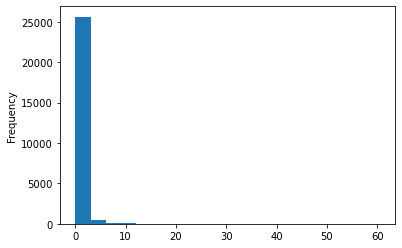

In [121]:
# Create histogram of the rice column
df_lcf['rice'].plot.hist(bins = 20)

<AxesSubplot:xlabel='rice', ylabel='rice'>

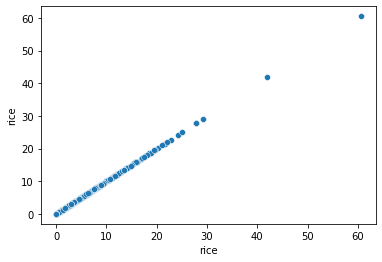

In [122]:
# Create a scatterplot of the rice column against itself to reveal if there are outliers
sns.scatterplot(x = 'rice', y = 'rice', data = df_lcf)

In [123]:
# Contains outliers 
# Find values above the threshold £25 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['rice'] > 25].iloc[:,:20]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,household_type,quarter,rice,bread,buns_biscuits,pasta,cakes_puddings,pastry,other_bread_cereal,beef
30,31,0,0,2,3,0,0,0,0,5,Index,April to June,29.125,1.600,0.500,0.000,1.995,0.00,4.190,0.0
4148,4149,0,0,1,4,1,0,0,0,6,Index,April to June,27.750,6.125,3.150,5.070,9.775,0.00,14.030,0.0
20037,20038,0,0,0,1,1,1,0,1,4,Index,January to March,42.000,1.595,1.995,1.000,0.000,0.00,9.000,1.7
20147,20148,1,0,2,2,0,0,0,0,5,Index,April to June,27.725,1.600,0.000,0.995,0.815,1.69,1.210,0.0
23371,23372,0,0,4,2,0,0,0,0,6,Index,July to September,60.500,3.670,7.000,0.000,6.055,0.00,7.335,0.0


Remove outliers unique_id's 23372 and 20038 where the cost of rice is above £40.

In [124]:
# Describe the variable 'bread'
df_lcf['bread'].describe()

count    26271.000000
mean         2.559269
std          2.256956
min          0.000000
25%          1.000000
50%          2.000000
75%          3.520000
max         32.265000
Name: bread, dtype: float64

<AxesSubplot:ylabel='Frequency'>

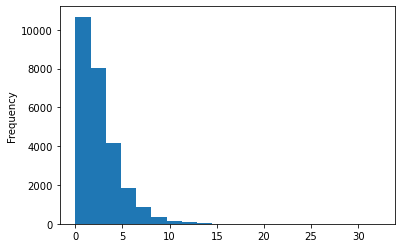

In [125]:
# Create histogram of the bread column
df_lcf['bread'].plot.hist(bins = 20)

<AxesSubplot:xlabel='bread', ylabel='bread'>

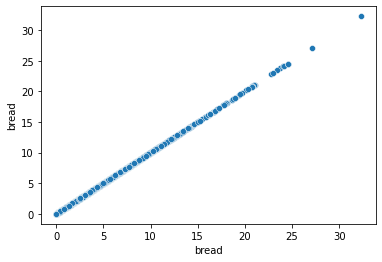

In [126]:
# Create a scatterplot of the bread column against itself to reveal if there are outliers
sns.scatterplot(x = 'bread', y = 'bread', data = df_lcf)

In [127]:
# Contains outliers 
# Find values above the threshold £24 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['bread'] > 24].iloc[:,:15]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,household_type,quarter,rice,bread,buns_biscuits
14526,14527,0,0,0,1,0,0,0,0,1,Index,July to September,0.00,24.090,0.000
19140,19141,1,1,0,2,0,0,0,0,4,Index,October to December,0.40,24.125,4.550
21551,21552,0,0,0,0,0,1,0,1,2,Index,April to June,1.30,24.525,1.500
22035,22036,0,0,2,0,2,0,0,0,4,Index,October to December,0.00,24.535,5.335
23574,23575,0,0,3,1,1,0,0,0,5,Index,April to June,0.00,32.265,5.635
26180,26181,0,0,0,0,1,1,0,0,2,Index,January to March,1.47,27.075,2.150


In [128]:
# Describe the variable 'buns_biscuits'
df_lcf['buns_biscuits'].describe()

count    26271.000000
mean         2.343465
std          2.559288
min          0.000000
25%          0.500000
50%          1.620000
75%          3.305000
max         47.025000
Name: buns_biscuits, dtype: float64

<AxesSubplot:ylabel='Frequency'>

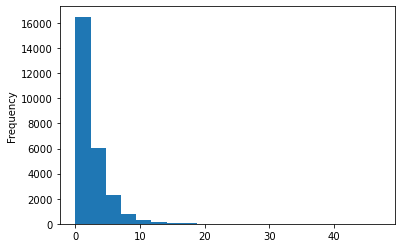

In [129]:
# Create histogram of the buns_biscuits column
df_lcf['buns_biscuits'].plot.hist(bins = 20)

<AxesSubplot:xlabel='buns_biscuits', ylabel='buns_biscuits'>

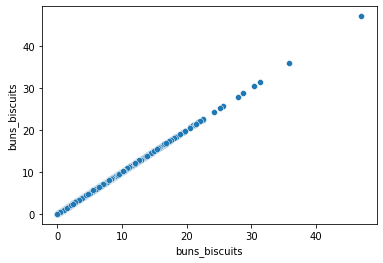

In [130]:
# Create a scatterplot of the buns_biscuits column against itself to reveal if there are outliers
sns.scatterplot(x = 'buns_biscuits', y = 'buns_biscuits', data = df_lcf)

In [131]:
# Contains outliers 
# Find values above the threshold £30 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['buns_biscuits'] > 30].iloc[:,:15]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,household_type,quarter,rice,bread,buns_biscuits
955,956,0,0,2,3,1,0,0,0,6,Index,October to December,0.00,2.000,30.380
11936,11937,1,0,0,2,0,0,0,0,3,Index,October to December,2.25,0.750,35.900
16276,16277,0,1,4,2,0,0,0,0,7,Index,October to December,0.00,1.975,31.370
19100,19101,0,0,0,1,1,0,0,0,2,Index,October to December,0.00,1.250,47.025


In [132]:
# Describe the variable 'pasta'
df_lcf['pasta'].describe()

count    26271.000000
mean         0.426580
std          0.845674
min          0.000000
25%          0.000000
50%          0.000000
75%          0.560000
max         36.250000
Name: pasta, dtype: float64

<AxesSubplot:ylabel='Frequency'>

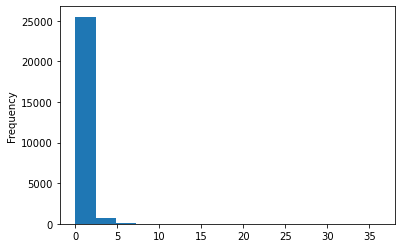

In [133]:
# Create histogram of the pasta column
df_lcf['pasta'].plot.hist(bins = 15)

<AxesSubplot:xlabel='pasta', ylabel='pasta'>

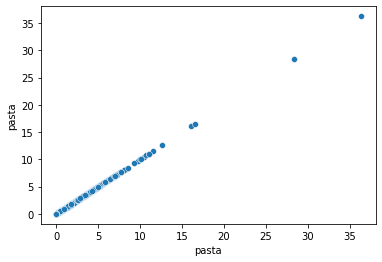

In [134]:
# Create a scatterplot of the pasta column against itself to reveal if there are outliers
sns.scatterplot(x = 'pasta', y = 'pasta', data = df_lcf)

In [135]:
# Contains outliers 
# Find values above the threshold £20 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['pasta'] > 20].iloc[:,:16]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,household_type,quarter,rice,bread,buns_biscuits,pasta
9270,9271,0,0,1,0,2,0,0,0,3,Index,April to June,0.0,8.585,1.665,36.25
20737,20738,0,0,0,0,2,0,0,0,2,Index,October to December,0.5,2.245,3.375,28.33


In [136]:
# Describe the variable 'cakes_puddings'
df_lcf['cakes_puddings'].describe()

count    26271.000000
mean         1.561607
std          2.523113
min          0.000000
25%          0.000000
50%          0.750000
75%          2.105000
max         72.000000
Name: cakes_puddings, dtype: float64

<AxesSubplot:ylabel='Frequency'>

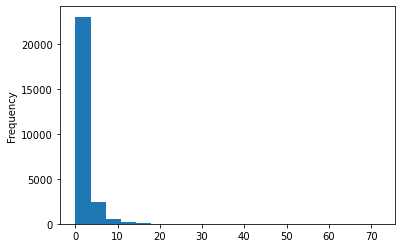

In [137]:
# Create histogram of the cakes_puddings column
df_lcf['cakes_puddings'].plot.hist(bins = 20)

<AxesSubplot:xlabel='cakes_puddings', ylabel='cakes_puddings'>

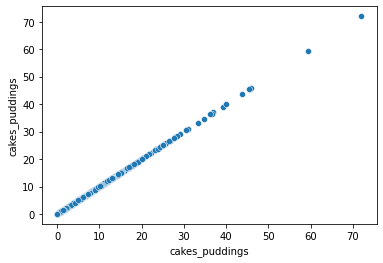

In [138]:
# Create a scatterplot of the cakes_puddings column against itself to reveal if there are outliers
sns.scatterplot(x = 'cakes_puddings', y = 'cakes_puddings', data = df_lcf)

In [139]:
# Contains outliers 
# Find values above the threshold £45 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['cakes_puddings'] > 45].iloc[:,:17]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,household_type,quarter,rice,bread,buns_biscuits,pasta,cakes_puddings
7480,7481,0,0,0,0,2,0,0,0,2,Index,July to September,0.000,1.625,0.325,0.000,45.700
7995,7996,0,0,0,2,2,0,0,0,4,Index,July to September,0.000,8.520,5.575,1.050,45.900
10395,10396,1,0,1,3,2,0,0,0,7,Index,April to June,1.295,5.830,7.280,3.275,59.245
20915,20916,0,1,0,2,0,0,0,0,3,Wealthy,October to December,0.000,7.850,12.950,0.000,72.000
25580,25581,0,0,3,0,2,0,0,0,5,Wealthy,October to December,0.550,9.295,15.665,0.000,45.450


In [140]:
# Describe the variable 'other_bread_cereal'
df_lcf['other_bread_cereal'].describe()

count    26271.000000
mean         2.418399
std          2.566073
min          0.000000
25%          0.500000
50%          1.740000
75%          3.445000
max         31.235000
Name: other_bread_cereal, dtype: float64

<AxesSubplot:ylabel='Frequency'>

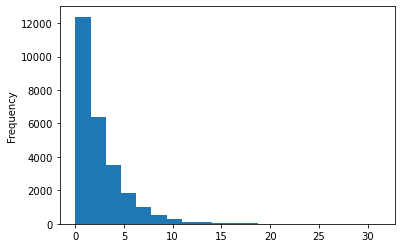

In [141]:
# Create histogram of the other_bread_cereal column
df_lcf['other_bread_cereal'].plot.hist(bins = 20)

<AxesSubplot:xlabel='other_bread_cereal', ylabel='other_bread_cereal'>

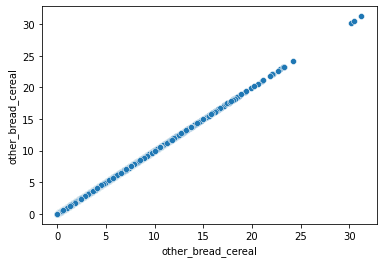

In [142]:
# Create a scatterplot of the other_bread_cereal column against itself to reveal if there are outliers
sns.scatterplot(x = 'other_bread_cereal', y = 'other_bread_cereal', data = df_lcf)

In [143]:
# Contains outliers 
# Find values above the threshold £25 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['other_bread_cereal'] > 25].iloc[:,:19]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,household_type,quarter,rice,bread,buns_biscuits,pasta,cakes_puddings,pastry,other_bread_cereal
2115,2116,1,1,0,2,0,0,0,0,4,Index,January to March,0.0,5.705,3.300,2.00,0.000,1.5,30.155
6419,6420,0,0,0,2,2,0,0,0,4,Index,July to September,0.0,0.840,3.065,0.00,1.270,0.0,30.520
10608,10609,0,0,2,2,1,0,0,2,7,Index,April to June,0.0,20.990,7.480,2.02,5.175,18.0,31.235


#### Meat

In [144]:
# Describe the variable 'beef'
df_lcf['beef'].describe()

count    26271.000000
mean         2.020651
std          3.699045
min          0.000000
25%          0.000000
50%          0.000000
75%          2.795000
max         78.620000
Name: beef, dtype: float64

<AxesSubplot:ylabel='Frequency'>

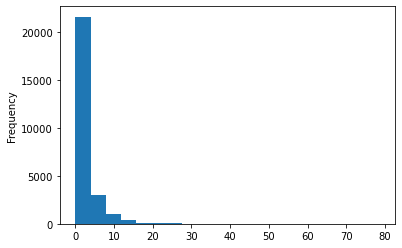

In [145]:
# Create histogram of the beef column
df_lcf['beef'].plot.hist(bins = 20)

<AxesSubplot:xlabel='beef', ylabel='beef'>

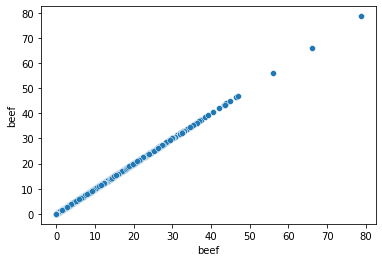

In [146]:
# Create a scatterplot of the beef column against itself to reveal if there are outliers
sns.scatterplot(x = 'beef', y = 'beef', data = df_lcf)

In [147]:
# Contains outliers 
# Find values above the threshold £50 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['beef'] > 50].iloc[:,:25]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,pasta,cakes_puddings,pastry,other_bread_cereal,beef,pork,lamb,poultry,sausages,bacon_ham
111,112,0,0,0,1,1,1,0,0,3,...,0.49,4.425,1.295,0.600,56.125,0.0,0.0,19.47,0.000,0.000
20731,20732,0,0,3,0,2,0,0,0,5,...,0.00,14.695,2.125,4.265,66.115,0.0,0.0,14.92,12.255,2.315
22897,22898,0,0,0,3,1,1,0,0,5,...,0.00,1.500,0.000,2.970,78.620,0.0,0.0,0.00,0.000,0.000


In [148]:
# Describe the variable 'pork'
df_lcf['pork'].describe()

count    26271.000000
mean         0.581369
std          1.553238
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         55.000000
Name: pork, dtype: float64

<AxesSubplot:ylabel='Frequency'>

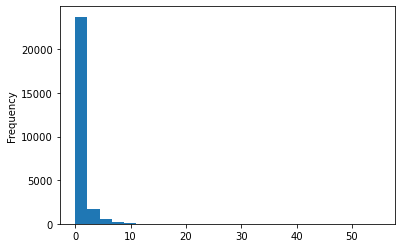

In [149]:
# Create histogram of the pork column
df_lcf['pork'].plot.hist(bins = 25)

<AxesSubplot:xlabel='pork', ylabel='pork'>

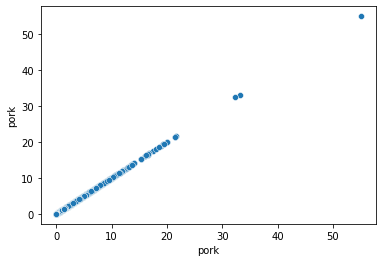

In [150]:
# Create a scatterplot of the pork column against itself to reveal if there are outliers
sns.scatterplot(x = 'pork', y = 'pork', data = df_lcf)

In [151]:
# Contains outliers 
# Find values above the threshold £30 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['pork'] > 30].iloc[:,:25]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,pasta,cakes_puddings,pastry,other_bread_cereal,beef,pork,lamb,poultry,sausages,bacon_ham
4504,4505,0,0,0,0,0,0,0,2,2,...,0.225,0.0,1.34,3.675,0.000,55.000,0.0,2.165,1.75,1.99
14837,14838,0,0,0,2,0,0,0,0,2,...,0.000,0.0,0.00,0.000,23.215,33.155,0.0,0.000,0.00,0.00
21840,21841,0,0,0,0,0,0,1,1,2,...,0.000,0.5,0.00,0.500,10.115,32.405,0.0,12.620,0.00,0.00


In [152]:
# Describe the variable 'lamb'
df_lcf['lamb'].describe()

count    26271.000000
mean         0.581286
std          2.263646
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         82.500000
Name: lamb, dtype: float64

<AxesSubplot:ylabel='Frequency'>

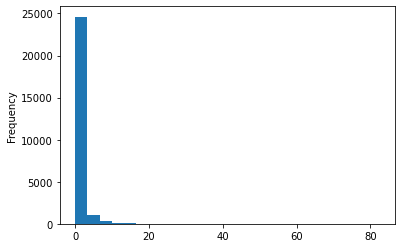

In [153]:
# Create histogram of the lamb column
df_lcf['lamb'].plot.hist(bins = 25)

<AxesSubplot:xlabel='lamb', ylabel='lamb'>

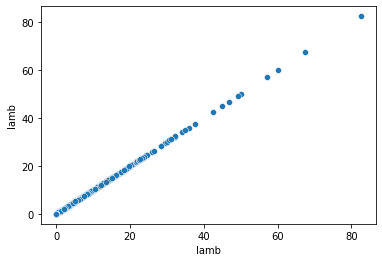

In [154]:
# Create a scatterplot of the lamb column against itself to reveal if there are outliers
sns.scatterplot(x = 'lamb', y = 'lamb', data = df_lcf)

In [155]:
# Describe the variable 'poultry'
df_lcf['poultry'].describe()

count    26271.000000
mean         2.268952
std          3.502660
min          0.000000
25%          0.000000
50%          1.080000
75%          3.260000
max         64.500000
Name: poultry, dtype: float64

<AxesSubplot:ylabel='Frequency'>

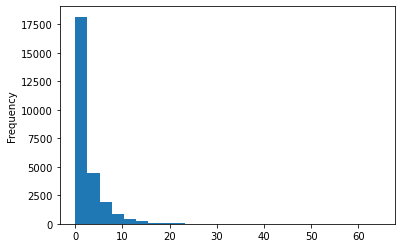

In [156]:
# Create histogram of the poultry column
df_lcf['poultry'].plot.hist(bins = 25)

<AxesSubplot:xlabel='poultry', ylabel='poultry'>

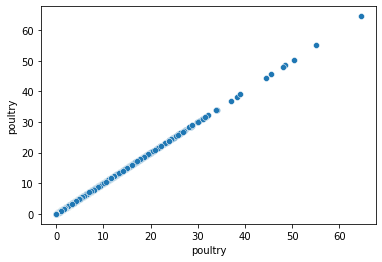

In [157]:
# Create a scatterplot of the poultry column against itself to reveal if there are outliers
sns.scatterplot(x = 'poultry', y = 'poultry', data = df_lcf)

In [158]:
# Describe the variable 'sausages'
df_lcf['sausages'].describe()

count    26271.000000
mean         0.886585
std          1.534049
min          0.000000
25%          0.000000
50%          0.000000
75%          1.250000
max         37.390000
Name: sausages, dtype: float64

<AxesSubplot:ylabel='Frequency'>

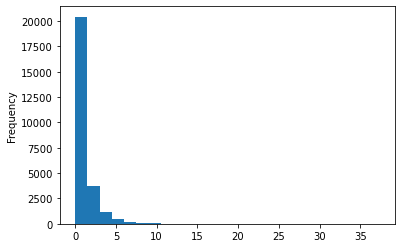

In [159]:
# Create histogram of the sausages column
df_lcf['sausages'].plot.hist(bins = 25)

<AxesSubplot:xlabel='sausages', ylabel='sausages'>

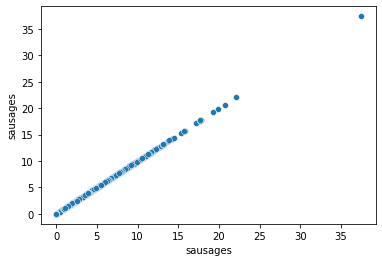

In [160]:
# Create a scatterplot of the sausages column against itself to reveal if there are outliers
sns.scatterplot(x = 'sausages', y = 'sausages', data = df_lcf)

In [161]:
# Contains outliers 
# Find values above the threshold £20 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['sausages'] > 20].iloc[:,:29]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,beef,pork,lamb,poultry,sausages,bacon_ham,offal_pate,processed_meat,meat,fish
14815,14816,0,0,0,0,2,0,0,0,2,...,29.48,0.000,0.0,0.00,37.390,0.000,0.0,5.140,0.0,0.000
18950,18951,0,0,1,2,0,0,0,0,3,...,0.00,0.000,0.0,9.20,22.115,0.000,0.0,2.560,0.0,8.415
25580,25581,0,0,3,0,2,0,0,0,5,...,14.09,4.425,0.0,39.06,20.685,5.275,1.0,17.675,0.0,0.000


In [162]:
# Describe the variable 'bacon_ham'
df_lcf['bacon_ham'].describe()

count    26271.000000
mean         0.896360
std          1.576956
min          0.000000
25%          0.000000
50%          0.000000
75%          1.320000
max         31.000000
Name: bacon_ham, dtype: float64

<AxesSubplot:ylabel='Frequency'>

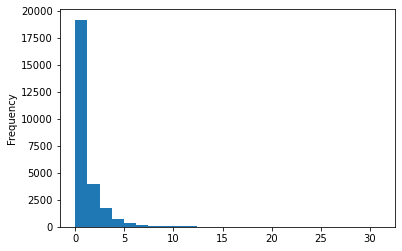

In [163]:
# Create histogram of the bacon_ham column
df_lcf['bacon_ham'].plot.hist(bins = 25)

<AxesSubplot:xlabel='bacon_ham', ylabel='bacon_ham'>

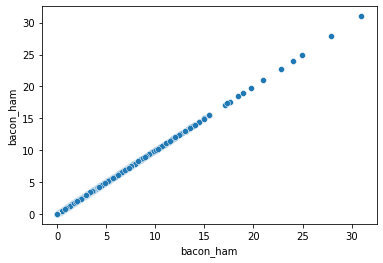

In [164]:
# Create a scatterplot of the bacon_ham column against itself to reveal if there are outliers
sns.scatterplot(x = 'bacon_ham', y = 'bacon_ham', data = df_lcf)

In [165]:
# Describe the variable 'offal_pate'
df_lcf['offal_pate'].describe()

count    26271.000000
mean         0.104216
std          0.508148
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         25.000000
Name: offal_pate, dtype: float64

<AxesSubplot:ylabel='Frequency'>

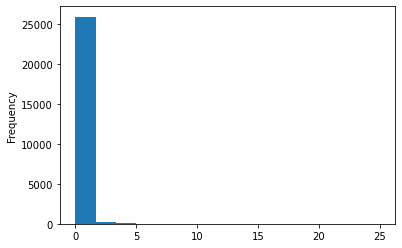

In [166]:
# Create histogram of the offal_pate column
df_lcf['offal_pate'].plot.hist(bins = 15)

<AxesSubplot:xlabel='offal_pate', ylabel='offal_pate'>

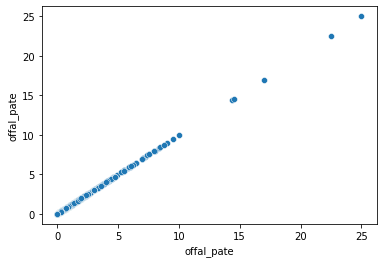

In [167]:
# Create a scatterplot of the offal_pate column against itself to reveal if there are outliers
sns.scatterplot(x = 'offal_pate', y = 'offal_pate', data = df_lcf)

In [168]:
# Describe the variable 'processed_meat'
df_lcf['processed_meat'].describe()

count    26271.000000
mean         5.458860
std          5.876816
min          0.000000
25%          1.375000
50%          3.885000
75%          7.665000
max        100.000000
Name: processed_meat, dtype: float64

<AxesSubplot:ylabel='Frequency'>

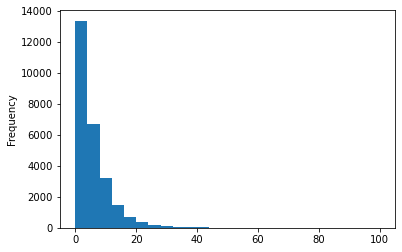

In [169]:
# Create histogram of the processed_meat column
df_lcf['processed_meat'].plot.hist(bins = 25)

<AxesSubplot:xlabel='processed_meat', ylabel='processed_meat'>

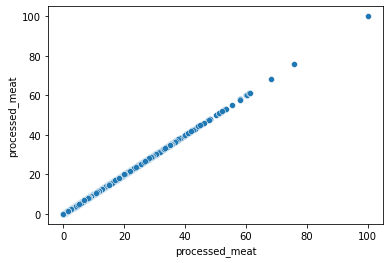

In [170]:
# Create a scatterplot of the processed_meat column against itself to reveal if there are outliers
sns.scatterplot(x = 'processed_meat', y = 'processed_meat', data = df_lcf)

In [171]:
# Contains outliers 
# Find values above the threshold £65 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['processed_meat'] > 65].iloc[:,:29]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,beef,pork,lamb,poultry,sausages,bacon_ham,offal_pate,processed_meat,meat,fish
8382,8383,0,0,4,1,1,0,0,0,6,...,0.00,0.0,0.0,0.00,10.385,3.00,0.0,68.215,0.0,0.0
14982,14983,0,0,0,1,1,0,0,0,2,...,16.25,1.5,0.0,2.29,0.000,3.90,0.0,100.000,0.0,0.0
16089,16090,0,1,0,1,0,1,1,0,4,...,5.22,7.5,0.0,0.00,1.000,1.25,0.0,75.695,0.0,0.0


In [172]:
# Describe the variable 'meat'
df_lcf['meat'].describe()

count    26271.000000
mean         0.018002
std          0.354415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         25.000000
Name: meat, dtype: float64

<AxesSubplot:ylabel='Frequency'>

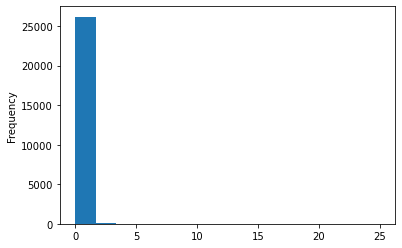

In [173]:
# Create histogram of the meat column
df_lcf['meat'].plot.hist(bins = 15)

<AxesSubplot:xlabel='meat', ylabel='meat'>

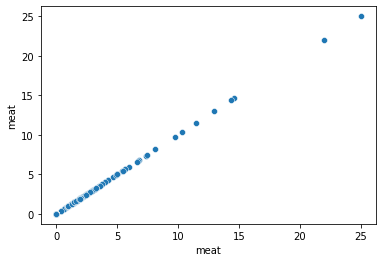

In [174]:
# Create a scatterplot of the meat column against itself to reveal if there are outliers
sns.scatterplot(x = 'meat', y = 'meat', data = df_lcf)

#### Seafood

In [175]:
# Describe the variable 'fish'
df_lcf['fish'].describe()

count    26271.000000
mean         0.923820
std          2.423315
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         52.950000
Name: fish, dtype: float64

<AxesSubplot:ylabel='Frequency'>

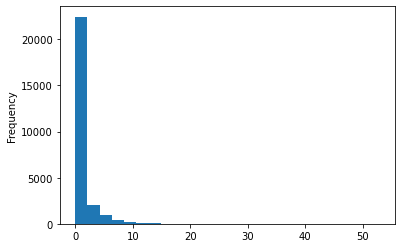

In [176]:
# Create histogram of the fish column
df_lcf['fish'].plot.hist(bins = 25)

<AxesSubplot:xlabel='fish', ylabel='fish'>

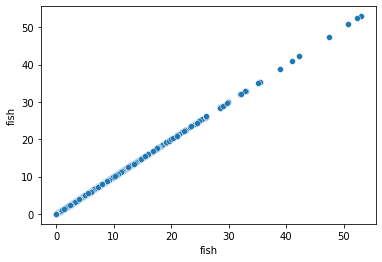

In [177]:
# Create a scatterplot of the fish column against itself to reveal if there are outliers
sns.scatterplot(x = 'fish', y = 'fish', data = df_lcf)

In [178]:
# Describe the variable 'seafood'
df_lcf['seafood'].describe()

count    26271.000000
mean         0.326514
std          1.289247
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         53.600000
Name: seafood, dtype: float64

<AxesSubplot:ylabel='Frequency'>

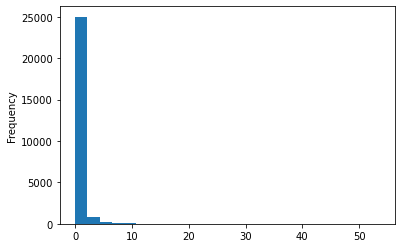

In [179]:
# Create histogram of the seafood column
df_lcf['seafood'].plot.hist(bins = 25)

<AxesSubplot:xlabel='seafood', ylabel='seafood'>

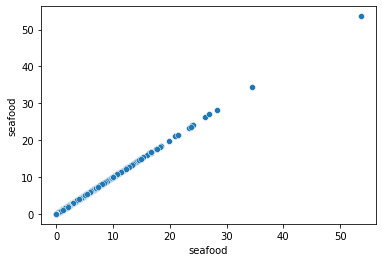

In [180]:
# Create a scatterplot of the seafood column against itself to reveal if there are outliers
sns.scatterplot(x = 'seafood', y = 'seafood', data = df_lcf)

In [181]:
# Contains outliers 
# Find values above the threshold £30 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['seafood'] > 30].iloc[:,:32]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,poultry,sausages,bacon_ham,offal_pate,processed_meat,meat,fish,seafood,preserved_seafood,processed_fish
259,260,0,2,0,2,0,0,0,0,4,...,0.000,1.49,0.0,0.0,0.0,0.0,3.0,34.495,0.0,0.475
9898,9899,1,0,0,1,1,0,0,0,3,...,18.485,0.00,4.0,0.0,25.7,0.0,7.0,53.600,0.0,4.000


In [182]:
# Describe the variable 'preserved_seafood'
df_lcf['preserved_seafood'].describe()

count    26271.000000
mean         0.325720
std          1.124225
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.225000
Name: preserved_seafood, dtype: float64

<AxesSubplot:ylabel='Frequency'>

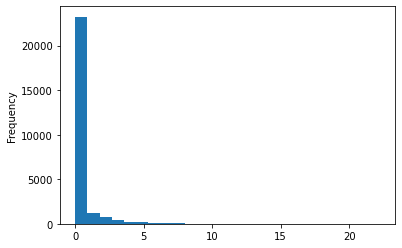

In [183]:
# Create histogram of the preserved_seafood column
df_lcf['preserved_seafood'].plot.hist(bins = 25)

<AxesSubplot:xlabel='preserved_seafood', ylabel='preserved_seafood'>

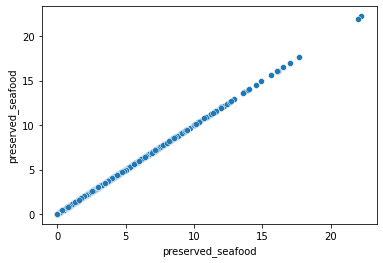

In [184]:
# Create a scatterplot of the preserved_seafood column against itself to reveal if there are outliers
sns.scatterplot(x = 'preserved_seafood', y = 'preserved_seafood', data = df_lcf)

In [185]:
# Describe the variable 'processed_fish'
df_lcf['processed_fish'].describe()

count    26271.000000
mean         1.280165
std          2.079021
min          0.000000
25%          0.000000
50%          0.370000
75%          1.875000
max         59.500000
Name: processed_fish, dtype: float64

<AxesSubplot:ylabel='Frequency'>

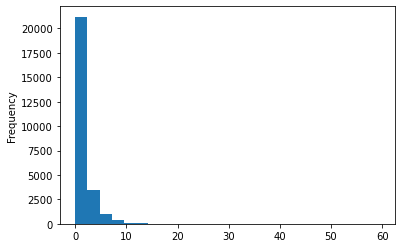

In [186]:
# Create histogram of the processed_fish column
df_lcf['processed_fish'].plot.hist(bins = 25)

<AxesSubplot:xlabel='processed_fish', ylabel='processed_fish'>

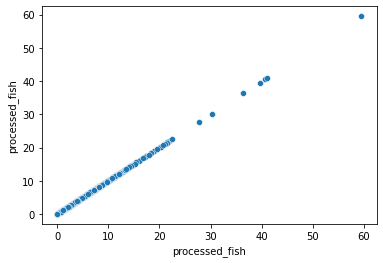

In [187]:
# Create a scatterplot of the processed_fish column against itself to reveal if there are outliers
sns.scatterplot(x = 'processed_fish', y = 'processed_fish', data = df_lcf)

In [188]:
# Contains outliers 
# Find values above the threshold £40 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['processed_fish'] > 40].iloc[:,:32]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,poultry,sausages,bacon_ham,offal_pate,processed_meat,meat,fish,seafood,preserved_seafood,processed_fish
4844,4845,0,0,0,0,1,0,0,0,1,...,0.0,0.00,0.0,0.0,60.00,0.0,0.0,0.00,0.000,59.500
15292,15293,0,0,2,1,1,0,0,0,4,...,0.0,0.00,0.0,0.0,17.15,0.0,0.0,0.00,0.000,40.625
24164,24165,0,0,0,0,0,0,0,2,2,...,0.0,3.07,0.0,0.0,40.90,0.0,0.0,11.42,1.815,41.000


#### Dairy, Eggs, Fats, Peanut Butter and Oils

In [189]:
# Describe the variable 'whole_milk'
df_lcf['whole_milk'].describe()

count    26271.000000
mean         0.422459
std          1.071273
min          0.000000
25%          0.000000
50%          0.000000
75%          0.245000
max         22.680000
Name: whole_milk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

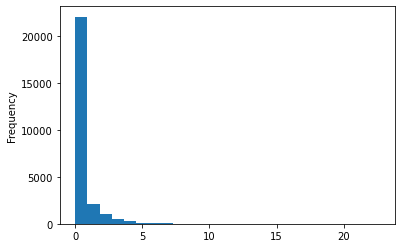

In [190]:
# Create histogram of the whole_milk column
df_lcf['whole_milk'].plot.hist(bins = 25)

<AxesSubplot:xlabel='whole_milk', ylabel='whole_milk'>

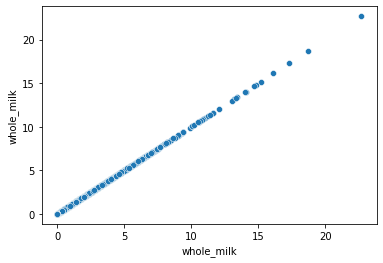

In [191]:
# Create a scatterplot of the whole_milk column against itself to reveal if there are outliers
sns.scatterplot(x = 'whole_milk', y = 'whole_milk', data = df_lcf)

In [192]:
# Describe the variable 'low_milk'
df_lcf['low_milk'].describe()

count    26271.000000
mean         1.520650
std          1.809067
min          0.000000
25%          0.290000
50%          1.090000
75%          2.140000
max         39.325000
Name: low_milk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

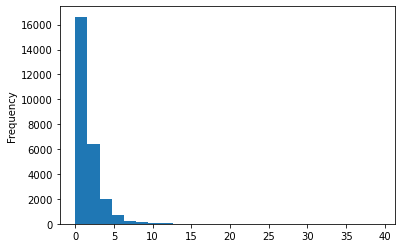

In [193]:
# Create histogram of the low_milk column
df_lcf['low_milk'].plot.hist(bins = 25)

<AxesSubplot:xlabel='low_milk', ylabel='low_milk'>

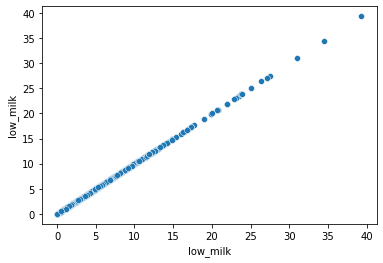

In [194]:
# Create a scatterplot of the low_milk column against itself to reveal if there are outliers
sns.scatterplot(x = 'low_milk', y = 'low_milk', data = df_lcf)

In [195]:
# Describe the variable 'preserved_milk'
df_lcf['preserved_milk'].describe()

count    26271.000000
mean         0.244767
std          1.675833
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         55.200000
Name: preserved_milk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

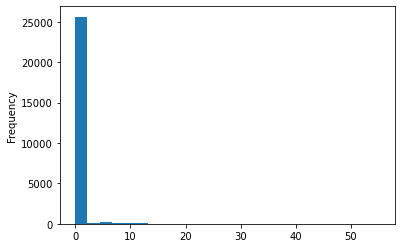

In [196]:
# Create histogram of the preserved_milk column
df_lcf['preserved_milk'].plot.hist(bins = 25)

<AxesSubplot:xlabel='preserved_milk', ylabel='preserved_milk'>

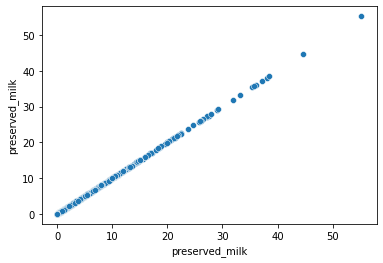

In [197]:
# Create a scatterplot of the preserved_milk column against itself to reveal if there are outliers
sns.scatterplot(x = 'preserved_milk', y = 'preserved_milk', data = df_lcf)

In [198]:
# Describe the variable 'yoghurt'
df_lcf['yoghurt'].describe()

count    26271.000000
mean         1.179337
std          1.713181
min          0.000000
25%          0.000000
50%          0.525000
75%          1.725000
max         27.375000
Name: yoghurt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

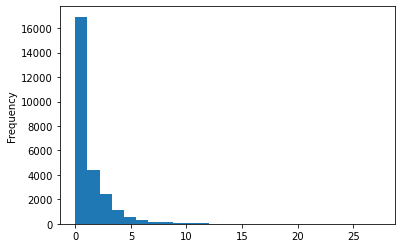

In [199]:
# Create histogram of the yoghurt column
df_lcf['yoghurt'].plot.hist(bins = 25)

<AxesSubplot:xlabel='yoghurt', ylabel='yoghurt'>

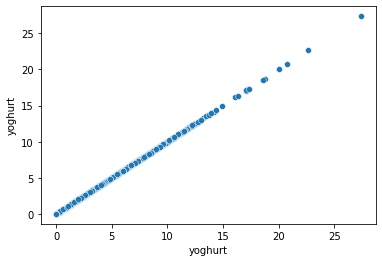

In [200]:
# Create a scatterplot of the yoghurt column against itself to reveal if there are outliers
sns.scatterplot(x = 'yoghurt', y = 'yoghurt', data = df_lcf)

In [201]:
# Describe the variable 'cheese'
df_lcf['cheese'].describe()

count    26271.000000
mean         2.019036
std          2.440334
min          0.000000
25%          0.000000
50%          1.375000
75%          2.890000
max         52.590000
Name: cheese, dtype: float64

<AxesSubplot:ylabel='Frequency'>

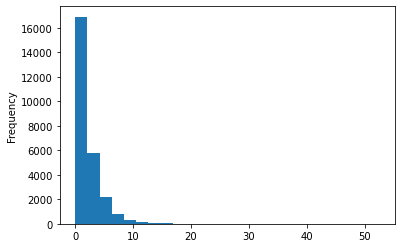

In [202]:
# Create histogram of the cheese column
df_lcf['cheese'].plot.hist(bins = 25)

<AxesSubplot:xlabel='cheese', ylabel='cheese'>

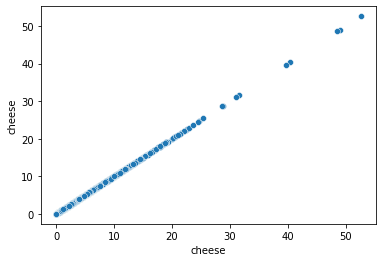

In [203]:
# Create a scatterplot of the cheese column against itself to reveal if there are outliers
sns.scatterplot(x = 'cheese', y = 'cheese', data = df_lcf)

In [204]:
# Describe the variable 'other_milk'
df_lcf['other_milk'].describe()

count    26271.000000
mean         1.077829
std          1.655459
min          0.000000
25%          0.000000
50%          0.500000
75%          1.500000
max         41.500000
Name: other_milk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

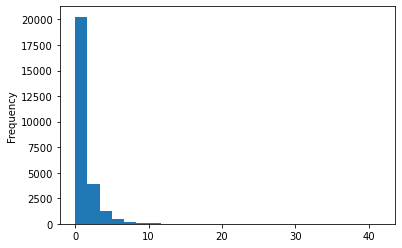

In [205]:
# Create histogram of the other_milk column
df_lcf['other_milk'].plot.hist(bins = 25)

<AxesSubplot:xlabel='other_milk', ylabel='other_milk'>

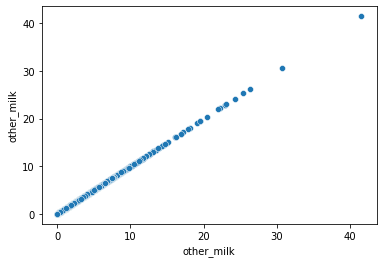

In [206]:
# Create a scatterplot of the other_milk column against itself to reveal if there are outliers
sns.scatterplot(x = 'other_milk', y = 'other_milk', data = df_lcf)

In [207]:
# Describe the variable 'eggs'
df_lcf['eggs'].describe()

count    26271.000000
mean         0.711432
std          0.924549
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max         13.180000
Name: eggs, dtype: float64

<AxesSubplot:ylabel='Frequency'>

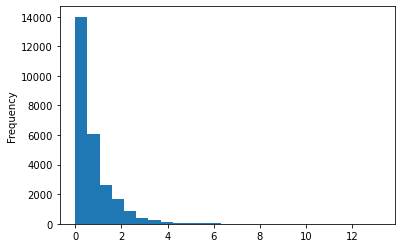

In [208]:
# Create histogram of the eggs column
df_lcf['eggs'].plot.hist(bins = 25)

<AxesSubplot:xlabel='eggs', ylabel='eggs'>

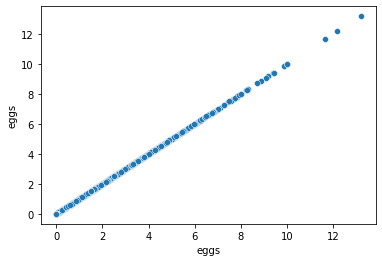

In [209]:
# Create a scatterplot of the eggs column against itself to reveal if there are outliers
sns.scatterplot(x = 'eggs', y = 'eggs', data = df_lcf)

In [210]:
# Describe the variable 'butter'
df_lcf['butter'].describe()

count    26271.000000
mean         0.477118
std          0.982134
min          0.000000
25%          0.000000
50%          0.000000
75%          0.725000
max         15.090000
Name: butter, dtype: float64

<AxesSubplot:ylabel='Frequency'>

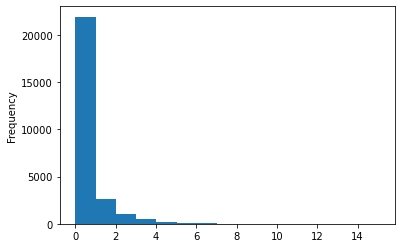

In [211]:
# Create histogram of the butter column
df_lcf['butter'].plot.hist(bins = 15)

<AxesSubplot:xlabel='butter', ylabel='butter'>

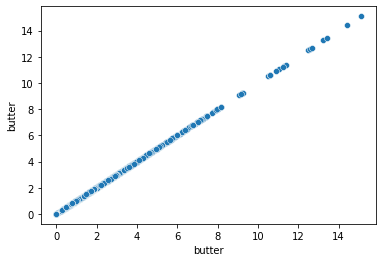

In [212]:
# Create a scatterplot of the butter column against itself to reveal if there are outliers
sns.scatterplot(x = 'butter', y = 'butter', data = df_lcf)

In [213]:
# Describe the variable 'margarine'
df_lcf['margarine'].describe()

count    26271.000000
mean         0.501607
std          0.887288
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max         17.050000
Name: margarine, dtype: float64

<AxesSubplot:ylabel='Frequency'>

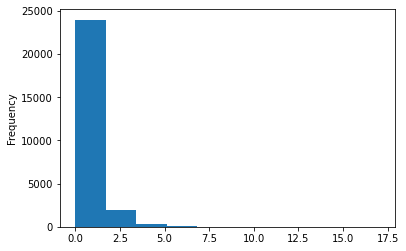

In [214]:
# Create histogram of the margarine column
df_lcf['margarine'].plot.hist(bins = 10)

<AxesSubplot:xlabel='margarine', ylabel='margarine'>

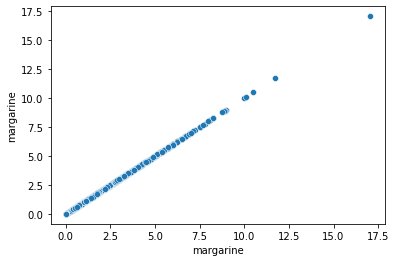

In [215]:
# Create a scatterplot of the margarine column against itself to reveal if there are outliers
sns.scatterplot(x = 'margarine', y = 'margarine', data = df_lcf)

In [216]:
# Describe the variable 'peanut_butter'
df_lcf['peanut_butter'].describe()

count    26271.000000
mean         0.067359
std          0.335313
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.995000
Name: peanut_butter, dtype: float64

<AxesSubplot:ylabel='Frequency'>

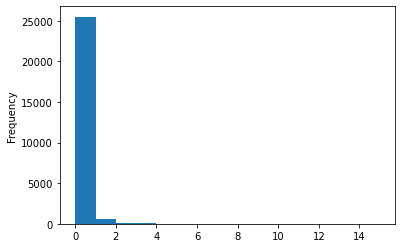

In [217]:
# Create histogram of the peanut_butter column
df_lcf['peanut_butter'].plot.hist(bins = 15)

<AxesSubplot:xlabel='peanut_butter', ylabel='peanut_butter'>

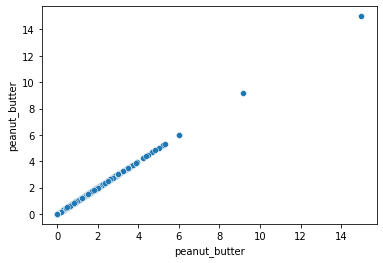

In [218]:
# Create a scatterplot of the peanut_butter column against itself to reveal if there are outliers
sns.scatterplot(x = 'peanut_butter', y = 'peanut_butter', data = df_lcf)

In [219]:
# Contains outliers 
# Find values above the threshold £5.50 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['peanut_butter'] > 5.5].iloc[:,:42]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,whole_milk,low_milk,preserved_milk,yoghurt,cheese,other_milk,eggs,butter,margarine,peanut_butter
5115,5116,0,0,0,1,2,0,0,0,3,...,0.0,1.335,0.0,1.000,2.250,0.625,1.500,0.00,0.0,14.995
7422,7423,0,0,0,2,1,0,0,0,3,...,0.0,8.900,0.0,2.250,8.590,0.000,3.375,0.00,0.0,9.175
9078,9079,0,0,0,2,0,0,0,0,2,...,0.0,0.195,0.0,0.000,1.385,0.990,3.430,0.00,0.0,5.990
21650,21651,0,0,0,5,0,0,0,0,5,...,0.0,1.150,0.0,5.475,5.815,5.600,1.175,2.05,0.0,6.000


In [220]:
# Describe the variable 'olive_oil'
df_lcf['olive_oil'].describe()

count    26271.000000
mean         0.144114
std          0.717429
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         53.850000
Name: olive_oil, dtype: float64

<AxesSubplot:ylabel='Frequency'>

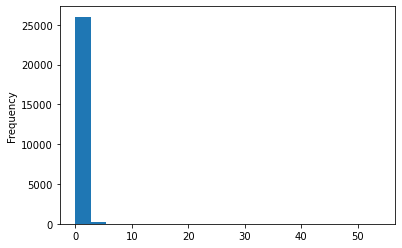

In [221]:
# Create histogram of the olive_oil column
df_lcf['olive_oil'].plot.hist(bins = 20)

<AxesSubplot:xlabel='olive_oil', ylabel='olive_oil'>

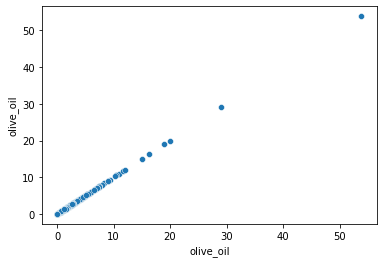

In [222]:
# Create a scatterplot of the olive_oil column against itself to reveal if there are outliers
sns.scatterplot(x = 'olive_oil', y = 'olive_oil', data = df_lcf)

In [223]:
# Contains outliers 
# Find values above the threshold £20 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['olive_oil'] > 20].iloc[:,:45]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,yoghurt,cheese,other_milk,eggs,butter,margarine,peanut_butter,olive_oil,oils,animal_fats
19475,19476,0,0,1,1,1,0,0,0,3,...,0.0,4.45,1.000,1.125,1.6,0.0,1.95,29.09,1.080,0.0
25945,25946,0,0,0,0,1,1,0,0,2,...,0.0,11.43,0.675,0.000,0.0,0.0,0.00,53.85,0.675,0.0


In [224]:
# Describe the variable 'oils'
df_lcf['oils'].describe()

count    26271.000000
mean         0.164798
std          1.214606
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        169.435000
Name: oils, dtype: float64

<AxesSubplot:ylabel='Frequency'>

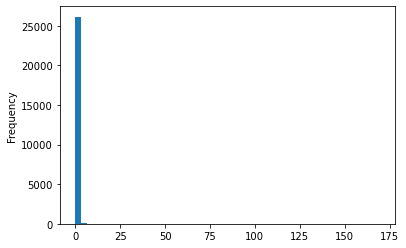

In [225]:
# Create histogram of the oils column
df_lcf['oils'].plot.hist(bins = 50)

<AxesSubplot:xlabel='oils', ylabel='oils'>

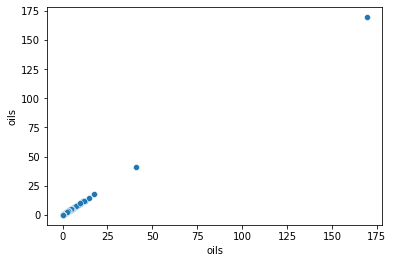

In [226]:
# Create a scatterplot of the oils column against itself to reveal if there are outliers
sns.scatterplot(x = 'oils', y = 'oils', data = df_lcf)

In [227]:
# Contains outliers 
# Find values above the threshold £25 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['oils'] > 25].iloc[:,:45]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,yoghurt,cheese,other_milk,eggs,butter,margarine,peanut_butter,olive_oil,oils,animal_fats
1468,1469,0,0,0,1,1,0,0,0,2,...,0.00,6.435,0.0,0.0,0.88,0.000,0.0,1.095,169.435,0.0
5065,5066,0,0,1,2,0,0,0,0,3,...,6.09,1.250,0.0,0.9,0.60,1.745,0.0,0.000,40.725,0.0


Remove unique_id 1469 which is an outlier compared ot other households.

In [228]:
# Describe the variable 'animal_fats'
df_lcf['animal_fats'].describe()

count    26271.000000
mean         0.023713
std          0.168764
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.950000
Name: animal_fats, dtype: float64

<AxesSubplot:ylabel='Frequency'>

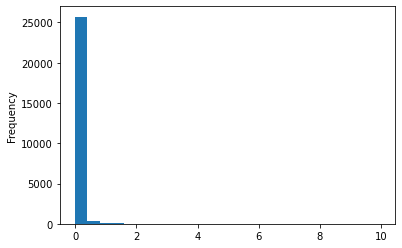

In [229]:
# Create histogram of the animal_fats column
df_lcf['animal_fats'].plot.hist(bins = 25)

<AxesSubplot:xlabel='animal_fats', ylabel='animal_fats'>

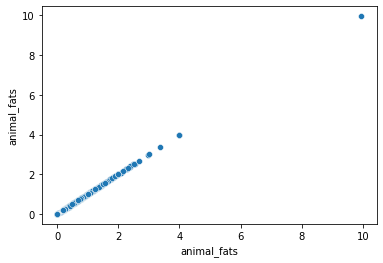

In [230]:
# Create a scatterplot of the animal_fats column against itself to reveal if there are outliers
sns.scatterplot(x = 'animal_fats', y = 'animal_fats', data = df_lcf)

In [231]:
# Contains outliers 
# Find values above the threshold £3.75 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['animal_fats'] > 3.75].iloc[:,:45]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,yoghurt,cheese,other_milk,eggs,butter,margarine,peanut_butter,olive_oil,oils,animal_fats
1576,1577,0,0,0,3,0,0,0,0,3,...,0.000,5.84,0.0,1.125,0.000,0.0,0.0,0.0,0.0,4.000
11894,11895,0,0,0,2,0,0,0,0,2,...,0.325,0.00,0.0,0.000,0.895,0.0,0.0,0.0,0.0,9.950
21899,21900,0,0,0,0,0,0,1,0,1,...,0.000,0.75,0.0,1.595,0.750,0.0,0.0,0.0,0.0,3.975


#### Fruit

In [232]:
# Describe the variable 'citrus_fruit'
df_lcf['citrus_fruit'].describe()

count    26271.000000
mean         0.600739
std          0.990965
min          0.000000
25%          0.000000
50%          0.000000
75%          0.875000
max         15.990000
Name: citrus_fruit, dtype: float64

<AxesSubplot:ylabel='Frequency'>

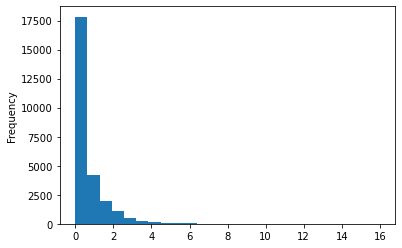

In [233]:
# Create histogram of the citrus_fruit column
df_lcf['citrus_fruit'].plot.hist(bins = 25)

<AxesSubplot:xlabel='citrus_fruit', ylabel='citrus_fruit'>

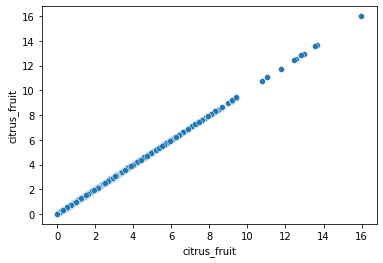

In [234]:
# Create a scatterplot of the citrus_fruit column against itself to reveal if there are outliers
sns.scatterplot(x = 'citrus_fruit', y = 'citrus_fruit', data = df_lcf)

In [235]:
# Describe the variable 'bananas'
df_lcf['bananas'].describe()

count    26271.000000
mean         0.497076
std          0.628108
min          0.000000
25%          0.000000
50%          0.345000
75%          0.780000
max         15.500000
Name: bananas, dtype: float64

<AxesSubplot:ylabel='Frequency'>

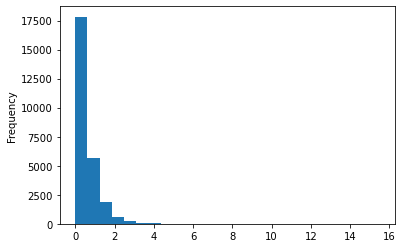

In [236]:
# Create histogram of the bananas column
df_lcf['bananas'].plot.hist(bins = 25)

<AxesSubplot:xlabel='bananas', ylabel='bananas'>

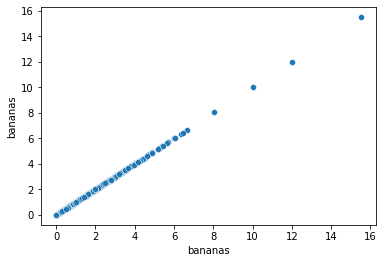

In [237]:
# Create a scatterplot of the bananas column against itself to reveal if there are outliers
sns.scatterplot(x = 'bananas', y = 'bananas', data = df_lcf)

In [238]:
# Contains outliers 
# Find values above the threshold £8 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['bananas'] > 8].iloc[:,:51]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,peanut_butter,olive_oil,oils,animal_fats,citrus_fruit,bananas,apples,pears,stone_fruits,berries
7049,7050,0,0,1,1,1,0,0,0,3,...,0.0,0.000,0.0,0.0,0.000,10.000,0.00,0.000,0.000,0.000
11870,11871,0,0,0,0,0,0,0,2,2,...,0.0,0.000,0.0,0.0,4.050,11.985,0.37,1.950,5.150,4.000
18509,18510,0,0,1,1,1,0,0,0,3,...,0.0,1.145,0.0,0.0,4.845,8.035,2.55,0.595,5.125,7.475
26036,26037,0,0,0,0,0,0,1,0,1,...,0.0,0.000,0.0,0.0,1.000,15.500,0.50,0.000,0.500,0.000


In [239]:
# Describe the variable 'apples'
df_lcf['apples'].describe()

count    26271.000000
mean         0.570774
std          0.951871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.845000
max         12.360000
Name: apples, dtype: float64

<AxesSubplot:ylabel='Frequency'>

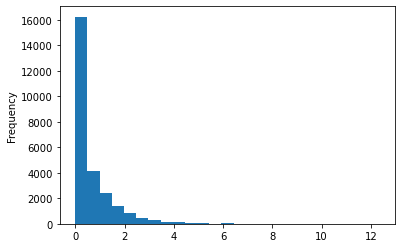

In [240]:
# Create histogram of the apples column
df_lcf['apples'].plot.hist(bins = 25)

<AxesSubplot:xlabel='apples', ylabel='apples'>

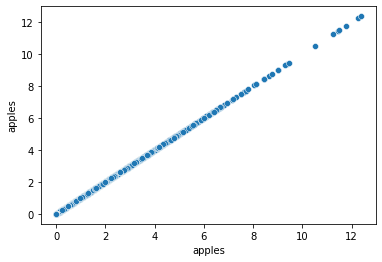

In [241]:
# Create a scatterplot of the apples column against itself to reveal if there are outliers
sns.scatterplot(x = 'apples', y = 'apples', data = df_lcf)

In [242]:
# Describe the variable 'pears'
df_lcf['pears'].describe()

count    26271.000000
mean         0.149108
std          0.428868
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.745000
Name: pears, dtype: float64

<AxesSubplot:ylabel='Frequency'>

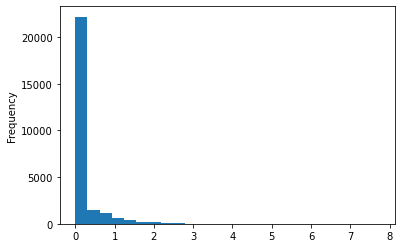

In [243]:
# Create histogram of the pears column
df_lcf['pears'].plot.hist(bins = 25)

<AxesSubplot:xlabel='pears', ylabel='pears'>

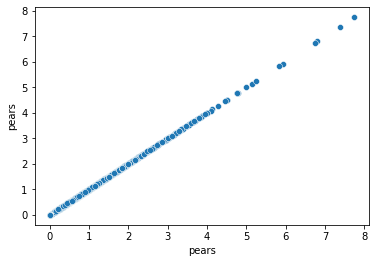

In [244]:
# Create a scatterplot of the pears column against itself to reveal if there are outliers
sns.scatterplot(x = 'pears', y = 'pears', data = df_lcf)

In [245]:
# Describe the variable 'stone_fruits'
df_lcf['stone_fruits'].describe()

count    26271.000000
mean         0.568697
std          1.270264
min          0.000000
25%          0.000000
50%          0.000000
75%          0.700000
max         27.845000
Name: stone_fruits, dtype: float64

<AxesSubplot:ylabel='Frequency'>

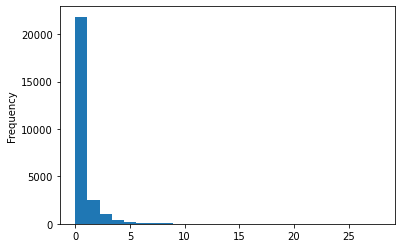

In [246]:
# Create histogram of the stone_fruits column
df_lcf['stone_fruits'].plot.hist(bins = 25)

<AxesSubplot:xlabel='stone_fruits', ylabel='stone_fruits'>

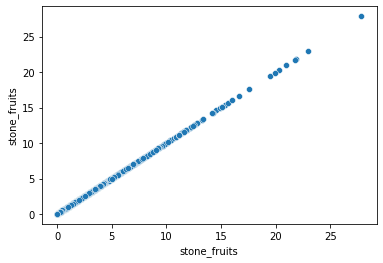

In [247]:
# Create a scatterplot of the stone_fruits column against itself to reveal if there are outliers
sns.scatterplot(x = 'stone_fruits', y = 'stone_fruits', data = df_lcf)

In [248]:
# Describe the variable 'berries'
df_lcf['berries'].describe()

count    26271.000000
mean         1.530809
std          2.350701
min          0.000000
25%          0.000000
50%          0.745000
75%          2.125000
max         32.860000
Name: berries, dtype: float64

<AxesSubplot:ylabel='Frequency'>

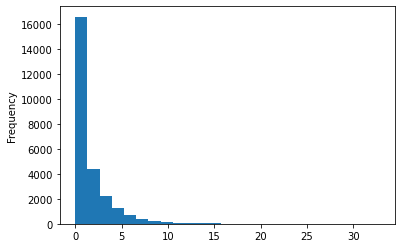

In [249]:
# Create histogram of the berries column
df_lcf['berries'].plot.hist(bins = 25)

<AxesSubplot:xlabel='berries', ylabel='berries'>

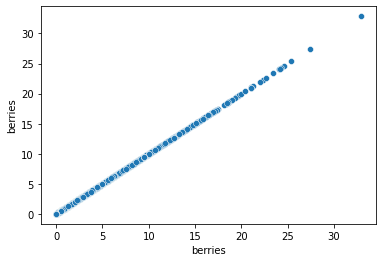

In [250]:
# Create a scatterplot of the berries column against itself to reveal if there are outliers
sns.scatterplot(x = 'berries', y = 'berries', data = df_lcf)

In [251]:
# Describe the variable 'fruits'
df_lcf['fruits'].describe()

count    26271.000000
mean         0.451538
std          1.076443
min          0.000000
25%          0.000000
50%          0.000000
75%          0.500000
max         30.940000
Name: fruits, dtype: float64

<AxesSubplot:ylabel='Frequency'>

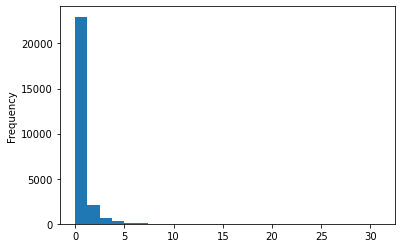

In [252]:
# Create histogram of the fruits column
df_lcf['fruits'].plot.hist(bins = 25)

<AxesSubplot:xlabel='fruits', ylabel='fruits'>

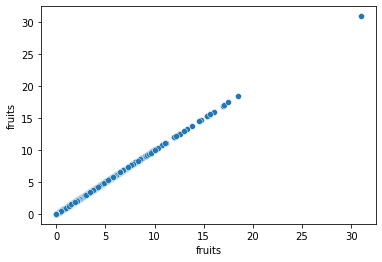

In [253]:
# Create a scatterplot of the beef column against itself to reveal if there are outliers
sns.scatterplot(x = 'fruits', y = 'fruits', data = df_lcf)

In [254]:
# Contains outliers 
# Find values above the threshold £17 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['fruits'] > 17].iloc[:,:54]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,animal_fats,citrus_fruit,bananas,apples,pears,stone_fruits,berries,fruits,dried_fruit_nuts,preserved_fruit
11870,11871,0,0,0,0,0,0,0,2,2,...,0.0,4.050,11.985,0.37,1.950,5.150,4.000,17.025,1.84,1.090
12868,12869,1,1,1,2,0,0,0,0,5,...,0.0,0.000,0.000,0.00,0.000,0.745,11.275,18.480,0.00,0.000
15379,15380,0,0,0,0,2,0,0,0,2,...,0.0,0.000,0.000,0.00,0.775,0.000,0.000,30.940,0.75,0.000
18509,18510,0,0,1,1,1,0,0,0,3,...,0.0,4.845,8.035,2.55,0.595,5.125,7.475,17.445,13.34,3.605


In [255]:
# Describe the variable 'dried_fruit_nuts'
df_lcf['dried_fruit_nuts'].describe()

count    26271.000000
mean         0.817008
std          1.937586
min          0.000000
25%          0.000000
50%          0.000000
75%          0.925000
max         75.000000
Name: dried_fruit_nuts, dtype: float64

<AxesSubplot:ylabel='Frequency'>

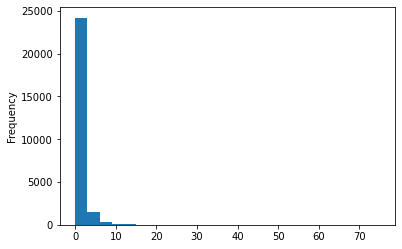

In [256]:
# Create histogram of the dried_fruit_nuts column
df_lcf['dried_fruit_nuts'].plot.hist(bins = 25)

<AxesSubplot:xlabel='dried_fruit_nuts', ylabel='dried_fruit_nuts'>

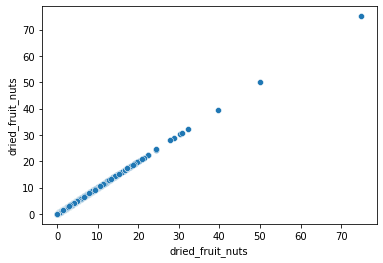

In [257]:
# Create a scatterplot of the dried_fruit_nuts column against itself to reveal if there are outliers
sns.scatterplot(x = 'dried_fruit_nuts', y = 'dried_fruit_nuts', data = df_lcf)

In [258]:
# Contains outliers 
# Find values above the threshold £35 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['dried_fruit_nuts'] > 35].iloc[:,:54]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,animal_fats,citrus_fruit,bananas,apples,pears,stone_fruits,berries,fruits,dried_fruit_nuts,preserved_fruit
6419,6420,0,0,0,2,2,0,0,0,4,...,0.0,1.250,2.90,0.800,0.000,0.000,2.975,0.000,39.555,0.0
15413,15414,0,0,0,0,0,0,0,2,2,...,0.0,0.785,0.72,4.775,0.775,3.410,9.370,0.595,50.120,0.0
22692,22693,0,0,3,2,0,0,0,0,5,...,0.0,0.790,1.41,0.000,0.000,5.815,0.925,0.000,75.000,0.0


In [259]:
# Describe the variable 'preserved_fruit'
df_lcf['preserved_fruit'].describe()

count    26271.000000
mean         0.153967
std          0.508168
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.995000
Name: preserved_fruit, dtype: float64

<AxesSubplot:ylabel='Frequency'>

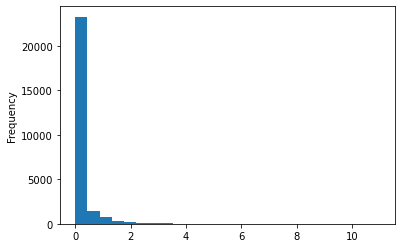

In [260]:
# Create histogram of the preserved_fruit column
df_lcf['preserved_fruit'].plot.hist(bins = 25)

<AxesSubplot:xlabel='preserved_fruit', ylabel='preserved_fruit'>

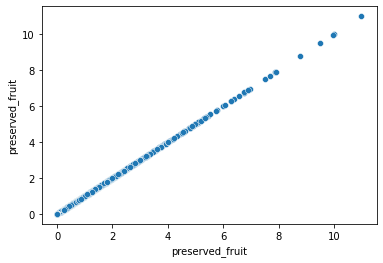

In [261]:
# Create a scatterplot of the preserved_fruit column against itself to reveal if there are outliers
sns.scatterplot(x = 'preserved_fruit', y = 'preserved_fruit', data = df_lcf)

#### Vegetables

In [262]:
# Describe the variable 'fresh_veg'
df_lcf['fresh_veg'].describe()

count    26271.000000
mean         0.938949
std          1.380786
min          0.000000
25%          0.000000
50%          0.495000
75%          1.310000
max         34.500000
Name: fresh_veg, dtype: float64

<AxesSubplot:ylabel='Frequency'>

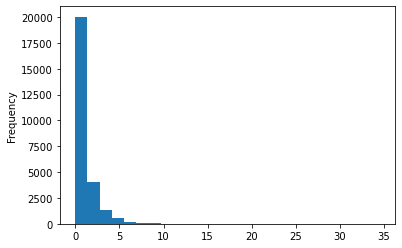

In [263]:
# Create histogram of the fresh_veg column
df_lcf['fresh_veg'].plot.hist(bins = 25)

<AxesSubplot:xlabel='fresh_veg', ylabel='fresh_veg'>

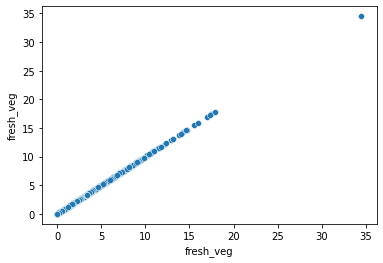

In [264]:
# Create a scatterplot of the fresh_veg column against itself to reveal if there are outliers
sns.scatterplot(x = 'fresh_veg', y = 'fresh_veg', data = df_lcf)

In [265]:
# Contains outliers 
# Find values above the threshold £17 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['fresh_veg'] > 17].iloc[:,:62]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,dried_fruit_nuts,preserved_fruit,fresh_veg,cabbage,veg,root_veg,dried_veg,preserved_veg,potatoes,tuber_veg
15715,15716,0,0,0,0,1,1,0,0,2,...,12.340,0.00,17.410,0.205,10.245,8.890,1.62,6.775,3.985,1.38
16105,16106,0,0,0,0,0,2,0,0,2,...,7.895,0.00,34.500,0.750,0.000,1.425,0.00,3.285,0.500,4.94
23253,23254,0,0,0,0,0,0,0,2,2,...,0.000,0.00,17.865,0.000,4.465,2.655,0.00,10.990,2.385,0.00
24339,24340,0,0,0,0,0,0,0,2,2,...,4.375,0.55,17.280,3.065,2.255,6.380,0.89,0.125,0.000,2.14


In [266]:
# Describe the variable 'cabbage'
df_lcf['cabbage'].describe()

count    26271.000000
mean         0.386220
std          0.657762
min          0.000000
25%          0.000000
50%          0.000000
75%          0.545000
max         11.390000
Name: cabbage, dtype: float64

<AxesSubplot:ylabel='Frequency'>

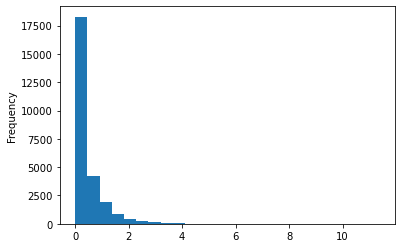

In [267]:
# Create histogram of the cabbage column
df_lcf['cabbage'].plot.hist(bins = 25)

<AxesSubplot:xlabel='cabbage', ylabel='cabbage'>

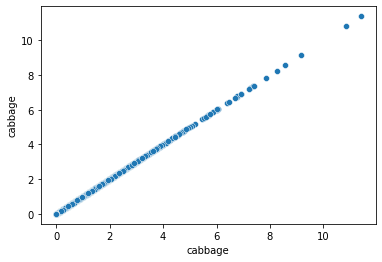

In [268]:
# Create a scatterplot of the cabbage column against itself to reveal if there are outliers
sns.scatterplot(x = 'cabbage', y = 'cabbage', data = df_lcf)

In [269]:
# Describe the variable 'veg'
df_lcf['veg'].describe()

count    26271.000000
mean         1.465424
std          1.765108
min          0.000000
25%          0.175000
50%          0.945000
75%          2.100000
max         28.605000
Name: veg, dtype: float64

<AxesSubplot:ylabel='Frequency'>

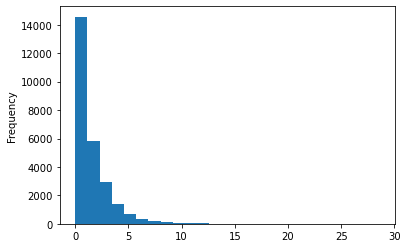

In [270]:
# Create histogram of the veg column
df_lcf['veg'].plot.hist(bins = 25)

<AxesSubplot:xlabel='veg', ylabel='veg'>

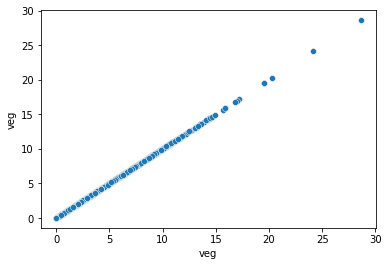

In [271]:
# Create a scatterplot of the veg column against itself to reveal if there are outliers
sns.scatterplot(x = 'veg', y = 'veg', data = df_lcf)

In [272]:
# Describe the variable 'root_veg'
df_lcf['root_veg'].describe()

count    26271.000000
mean         1.410795
std          1.892764
min          0.000000
25%          0.290000
50%          0.975000
75%          1.955000
max         63.175000
Name: root_veg, dtype: float64

<AxesSubplot:ylabel='Frequency'>

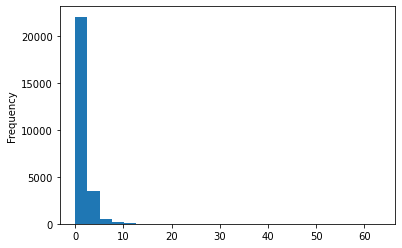

In [273]:
# Create histogram of the root_veg column
df_lcf['root_veg'].plot.hist(bins = 25)

<AxesSubplot:xlabel='root_veg', ylabel='root_veg'>

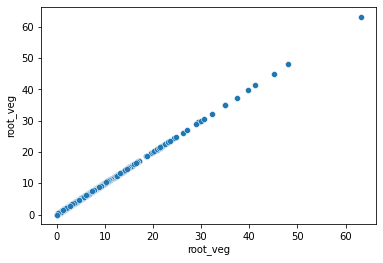

In [274]:
# Create a scatterplot of the root_veg column against itself to reveal if there are outliers
sns.scatterplot(x = 'root_veg', y = 'root_veg', data = df_lcf)

In [275]:
# Describe the variable 'dried_veg'
df_lcf['dried_veg'].describe()

count    26271.000000
mean         0.055676
std          0.342263
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.660000
Name: dried_veg, dtype: float64

<AxesSubplot:ylabel='Frequency'>

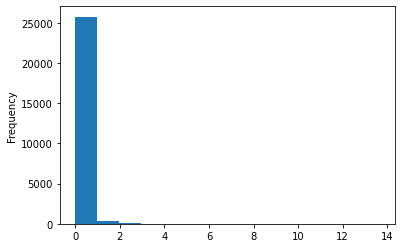

In [276]:
# Create histogram of the dried_veg column
df_lcf['dried_veg'].plot.hist(bins = 14)

<AxesSubplot:xlabel='dried_veg', ylabel='dried_veg'>

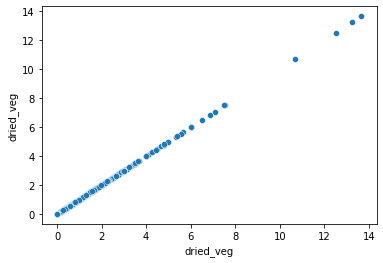

In [277]:
# Create a scatterplot of the dried_veg column against itself to reveal if there are outliers
sns.scatterplot(x = 'dried_veg', y = 'dried_veg', data = df_lcf)

In [278]:
# Describe the variable 'preserved_veg'
df_lcf['preserved_veg'].describe()

count    26271.000000
mean         1.654332
std          2.374480
min          0.000000
25%          0.080000
50%          0.980000
75%          2.200000
max         56.395000
Name: preserved_veg, dtype: float64

<AxesSubplot:ylabel='Frequency'>

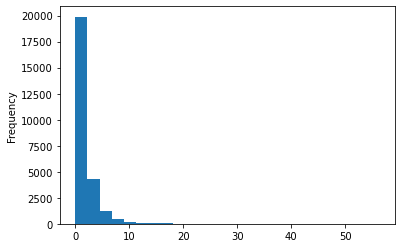

In [279]:
# Create histogram of the preserved_veg column
df_lcf['preserved_veg'].plot.hist(bins = 25)

<AxesSubplot:xlabel='preserved_veg', ylabel='preserved_veg'>

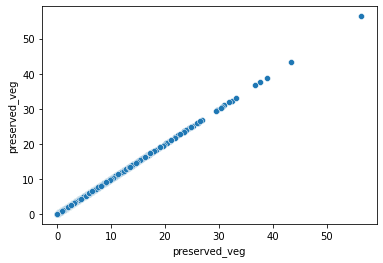

In [280]:
# Create a scatterplot of the preserved_veg column against itself to reveal if there are outliers
sns.scatterplot(x = 'preserved_veg', y = 'preserved_veg', data = df_lcf)

In [281]:
# Describe the variable 'potatoes'
df_lcf['potatoes'].describe()

count    26271.000000
mean         0.795489
std          1.004595
min          0.000000
25%          0.000000
50%          0.500000
75%          1.200000
max         22.000000
Name: potatoes, dtype: float64

<AxesSubplot:ylabel='Frequency'>

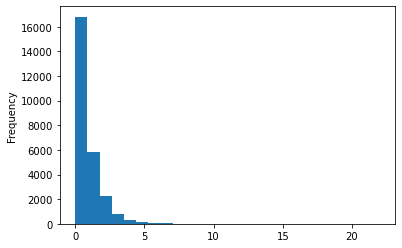

In [282]:
# Create histogram of the potatoes column
df_lcf['potatoes'].plot.hist(bins = 25)

<AxesSubplot:xlabel='potatoes', ylabel='potatoes'>

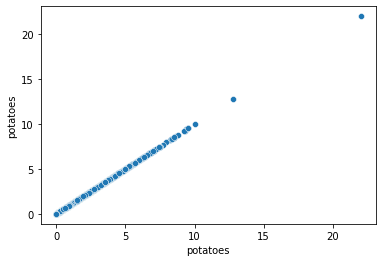

In [283]:
# Create a scatterplot of the potatoes column against itself to reveal if there are outliers
sns.scatterplot(x = 'potatoes', y = 'potatoes', data = df_lcf)

In [284]:
# Contains outliers 
# Find values above the threshold £9.75 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['potatoes'] > 9.75].iloc[:,:62]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,dried_fruit_nuts,preserved_fruit,fresh_veg,cabbage,veg,root_veg,dried_veg,preserved_veg,potatoes,tuber_veg
2193,2194,0,0,0,2,1,0,2,0,5,...,2.245,1.245,0.75,1.145,0.575,5.055,0.000,3.00,12.8,0.000
8764,8765,0,0,0,1,0,0,1,1,3,...,0.000,0.715,1.05,1.170,4.235,5.380,0.555,4.86,22.0,0.000
18580,18581,0,0,0,0,0,0,2,0,2,...,0.150,0.000,1.31,1.975,3.840,0.900,0.000,4.30,10.0,3.075


In [285]:
# Describe the variable 'tuber_veg'
df_lcf['tuber_veg'].describe()

count    26271.000000
mean         1.710317
std          1.996529
min          0.000000
25%          0.000000
50%          1.095000
75%          2.500000
max         22.400000
Name: tuber_veg, dtype: float64

<AxesSubplot:ylabel='Frequency'>

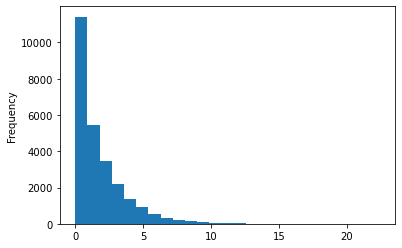

In [286]:
# Create histogram of the tuber_veg column
df_lcf['tuber_veg'].plot.hist(bins = 25)

<AxesSubplot:xlabel='tuber_veg', ylabel='tuber_veg'>

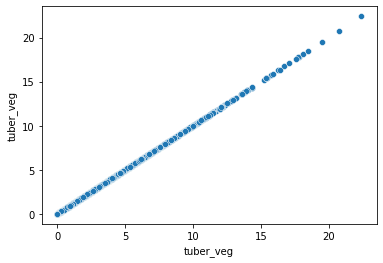

In [287]:
# Create a scatterplot of the tuber_veg column against itself to reveal if there are outliers
sns.scatterplot(x = 'tuber_veg', y = 'tuber_veg', data = df_lcf)

#### Sugar and Confectionary

In [288]:
# Describe the variable 'sugar'
df_lcf['sugar'].describe()

count    26271.000000
mean         0.205390
std          0.536197
min          0.000000
25%          0.000000
50%          0.000000
75%          0.225000
max         23.400000
Name: sugar, dtype: float64

<AxesSubplot:ylabel='Frequency'>

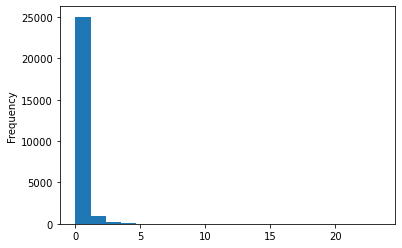

In [289]:
# Create histogram of the sugar column
df_lcf['sugar'].plot.hist(bins = 20)

<AxesSubplot:xlabel='sugar', ylabel='sugar'>

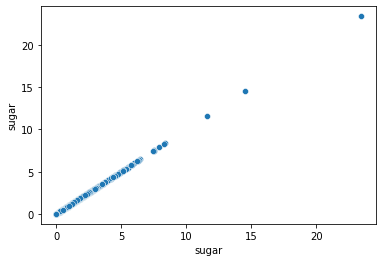

In [290]:
# Create a scatterplot of the sugar column against itself to reveal if there are outliers
sns.scatterplot(x = 'sugar', y = 'sugar', data = df_lcf)

In [291]:
# Contains outliers 
# Find values above the threshold £20 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['sugar'] > 10].iloc[:,:70]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,potatoes,tuber_veg,sugar,jam,chocolate,confectionary,ice_cream,sugar_prod,sauces,condiments
1227,1228,0,0,0,0,1,0,0,0,1,...,0.000,0.000,14.495,0.000,0.000,0.00,0.000,0.00,0.000,3.250
17138,17139,0,1,1,2,0,0,0,0,4,...,0.545,1.195,11.625,0.000,0.000,0.00,2.585,0.00,1.680,0.495
24520,24521,0,0,1,1,2,0,0,0,4,...,0.000,2.155,23.400,0.585,4.365,0.92,1.945,1.65,2.495,0.000


In [292]:
# Describe the variable 'jam'
df_lcf['jam'].describe()

count    26271.000000
mean         0.311617
std          0.879162
min          0.000000
25%          0.000000
50%          0.000000
75%          0.275000
max         30.480000
Name: jam, dtype: float64

<AxesSubplot:ylabel='Frequency'>

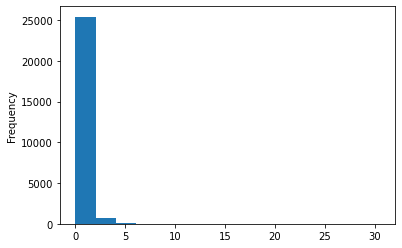

In [293]:
# Create histogram of the jam column
df_lcf['jam'].plot.hist(bins = 15)

<AxesSubplot:xlabel='jam', ylabel='jam'>

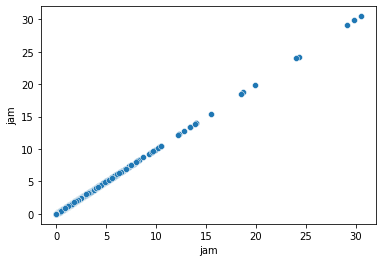

In [294]:
# Create a scatterplot of the jam column against itself to reveal if there are outliers
sns.scatterplot(x = 'jam', y = 'jam', data = df_lcf)

In [295]:
# Describe the variable 'chocolate'
df_lcf['chocolate'].describe()

count    26271.000000
mean         2.106035
std          3.518438
min          0.000000
25%          0.000000
50%          0.975000
75%          2.700000
max         69.990000
Name: chocolate, dtype: float64

<AxesSubplot:ylabel='Frequency'>

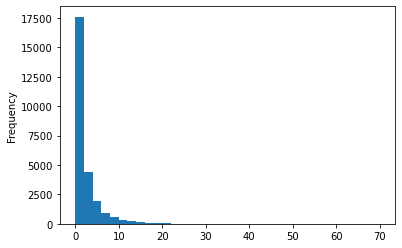

In [296]:
# Create histogram of the chocolate column
df_lcf['chocolate'].plot.hist(bins = 35)

<AxesSubplot:xlabel='chocolate', ylabel='chocolate'>

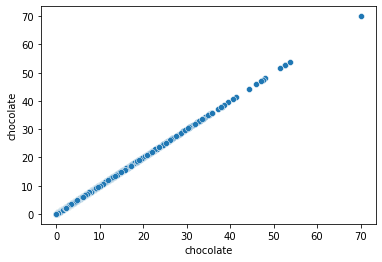

In [297]:
# Create a scatterplot of the chocolate column against itself to reveal if there are outliers
sns.scatterplot(x = 'chocolate', y = 'chocolate', data = df_lcf)

In [298]:
# Contains outliers 
# Find values above the threshold £50 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['chocolate'] > 50].iloc[:,:70]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,potatoes,tuber_veg,sugar,jam,chocolate,confectionary,ice_cream,sugar_prod,sauces,condiments
4588,4589,0,0,1,3,0,0,0,0,4,...,1.430,11.340,0.775,0.000,52.730,1.380,0.0,0.0,6.365,0.000
4808,4809,0,0,0,0,1,0,0,1,2,...,1.695,0.000,0.775,9.435,69.990,9.490,0.0,0.0,6.215,2.885
21248,21249,0,0,0,1,0,1,0,0,2,...,0.000,1.695,0.000,0.000,52.555,1.935,3.0,0.0,0.500,0.175
23430,23431,0,0,0,0,0,0,2,0,2,...,0.000,1.250,0.000,0.000,51.545,0.000,4.0,0.0,2.725,0.000
24733,24734,0,0,0,0,0,0,0,1,1,...,0.000,0.000,0.000,0.000,53.685,0.000,0.0,0.0,0.000,0.000


In [299]:
# Describe the variable 'confectionary'
df_lcf['confectionary'].describe()

count    26271.000000
mean         0.799933
std          1.500391
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         30.550000
Name: confectionary, dtype: float64

<AxesSubplot:ylabel='Frequency'>

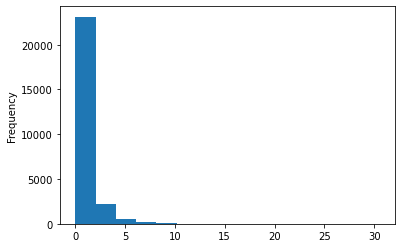

In [300]:
# Create histogram of the confectionary column
df_lcf['confectionary'].plot.hist(bins = 15)

<AxesSubplot:xlabel='confectionary', ylabel='confectionary'>

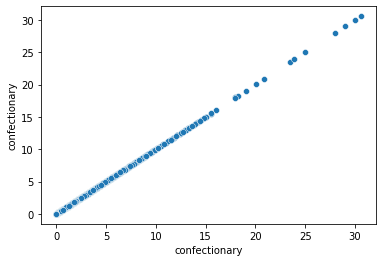

In [301]:
# Create a scatterplot of the confectionary column against itself to reveal if there are outliers
sns.scatterplot(x = 'confectionary', y = 'confectionary', data = df_lcf)

In [302]:
# Describe the variable 'ice_cream'
df_lcf['ice_cream'].describe()

count    26271.000000
mean         0.685649
std          1.388645
min          0.000000
25%          0.000000
50%          0.000000
75%          0.995000
max         21.735000
Name: ice_cream, dtype: float64

<AxesSubplot:ylabel='Frequency'>

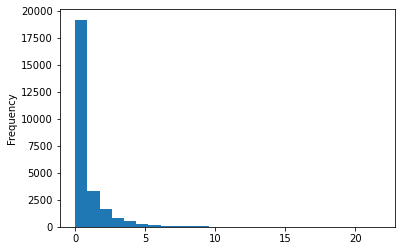

In [303]:
# Create histogram of the ice_cream column
df_lcf['ice_cream'].plot.hist(bins = 25)

<AxesSubplot:xlabel='ice_cream', ylabel='ice_cream'>

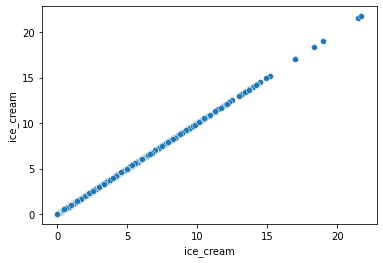

In [304]:
# Create a scatterplot of the ice_cream column against itself to reveal if there are outliers
sns.scatterplot(x = 'ice_cream', y = 'ice_cream', data = df_lcf)

In [305]:
# Describe the variable 'sugar_prod'
df_lcf['sugar_prod'].describe()

count    26271.000000
mean         0.168760
std          0.666842
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.500000
Name: sugar_prod, dtype: float64

<AxesSubplot:ylabel='Frequency'>

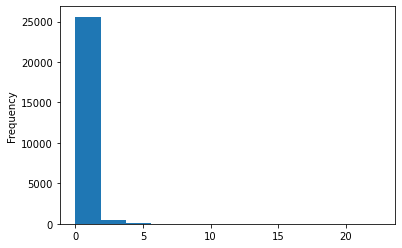

In [306]:
# Create histogram of the sugar_prod column
df_lcf['sugar_prod'].plot.hist(bins = 12)

<AxesSubplot:xlabel='sugar_prod', ylabel='sugar_prod'>

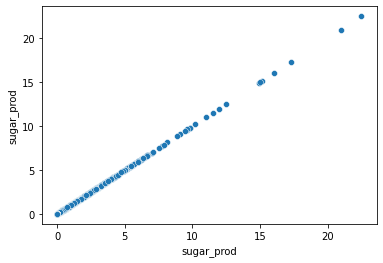

In [307]:
# Create a scatterplot of the sugar_prod column against itself to reveal if there are outliers
sns.scatterplot(x = 'sugar_prod', y = 'sugar_prod', data = df_lcf)

#### Sauces, Condiments and Other

In [308]:
# Describe the variable 'sauces'
df_lcf['sauces'].describe()

count    26271.000000
mean         1.243094
std          1.604266
min          0.000000
25%          0.000000
50%          0.750000
75%          1.825000
max         31.350000
Name: sauces, dtype: float64

<AxesSubplot:ylabel='Frequency'>

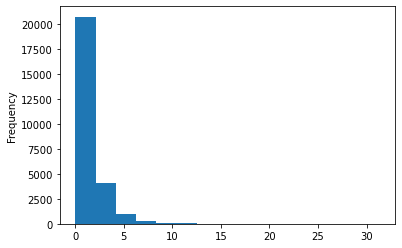

In [309]:
# Create histogram of the sauces column
df_lcf['sauces'].plot.hist(bins = 15)

<AxesSubplot:xlabel='sauces', ylabel='sauces'>

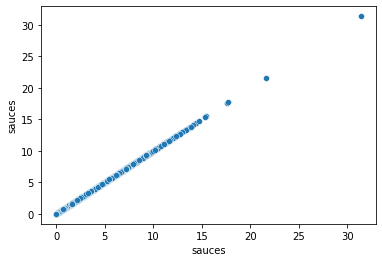

In [310]:
# Create a scatterplot of the sauces column against itself to reveal if there are outliers
sns.scatterplot(x = 'sauces', y = 'sauces', data = df_lcf)

In [311]:
# Contains outliers 
# Find values above the threshold £17 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['sauces'] > 17].iloc[:,:72]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,sugar,jam,chocolate,confectionary,ice_cream,sugar_prod,sauces,condiments,misc,other_food
1839,1840,0,0,0,0,0,2,0,0,2,...,2.15,0.0,2.155,0.000,1.995,0.0,21.605,3.210,3.870,0.0
1856,1857,0,1,0,2,0,0,0,0,3,...,0.00,0.0,8.250,1.000,0.000,0.0,17.580,0.000,0.750,0.0
13204,13205,0,0,0,0,0,1,0,1,2,...,0.00,0.0,1.500,17.945,1.875,0.0,31.350,0.000,2.825,0.0
13366,13367,0,0,0,0,0,0,0,2,2,...,0.00,1.0,6.390,0.500,3.500,0.0,17.680,0.525,1.050,0.0


In [312]:
# Describe the variable 'condiments'
df_lcf['condiments'].describe()

count    26271.000000
mean         0.229142
std          0.712465
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.210000
Name: condiments, dtype: float64

<AxesSubplot:ylabel='Frequency'>

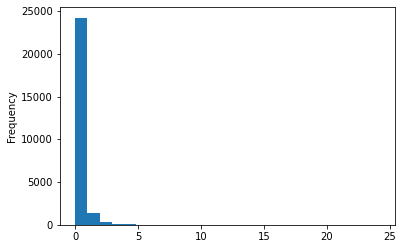

In [313]:
# Create histogram of the condiments column
df_lcf['condiments'].plot.hist(bins = 25)

<AxesSubplot:xlabel='condiments', ylabel='condiments'>

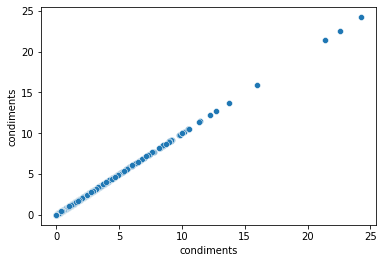

In [314]:
# Create a scatterplot of the condiments column against itself to reveal if there are outliers
sns.scatterplot(x = 'condiments', y = 'condiments', data = df_lcf)

In [315]:
# Describe the variable 'misc'
df_lcf['misc'].describe()

count    26271.000000
mean         1.064275
std          2.645148
min          0.000000
25%          0.000000
50%          0.325000
75%          1.310000
max        108.340000
Name: misc, dtype: float64

<AxesSubplot:ylabel='Frequency'>

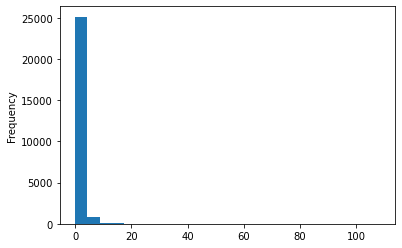

In [316]:
# Create histogram of the misc column
df_lcf['misc'].plot.hist(bins = 25)

<AxesSubplot:xlabel='misc', ylabel='misc'>

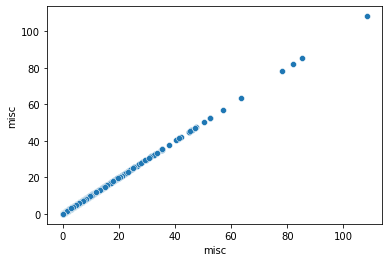

In [317]:
# Create a scatterplot of the veg column against itself to reveal if there are outliers
sns.scatterplot(x = 'misc', y = 'misc', data = df_lcf)

In [318]:
# Contains outliers 
# Find values above the threshold £60 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['misc'] > 60].iloc[:,:72]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,sugar,jam,chocolate,confectionary,ice_cream,sugar_prod,sauces,condiments,misc,other_food
6425,6426,0,0,0,2,2,0,0,0,4,...,0.00,0.0,1.500,0.0,0.5,0.0,0.000,0.0,85.200,0.0
14172,14173,0,0,0,1,1,0,0,0,2,...,2.34,0.0,7.375,1.0,0.0,0.0,0.375,0.0,63.665,0.0
19975,19976,0,1,0,2,0,0,0,0,3,...,0.00,0.0,4.250,1.5,0.0,0.0,2.350,0.3,78.280,0.0
20368,20369,0,0,0,0,1,1,0,0,2,...,0.00,0.0,0.000,0.0,0.0,0.0,0.825,0.0,82.100,0.0
24117,24118,0,0,0,2,0,0,0,0,2,...,1.60,0.0,8.350,1.5,0.0,1.0,0.000,0.0,108.340,0.0


In [319]:
# Describe the variable 'other_food'
df_lcf['other_food'].describe()

count    26271.000000
mean         0.065822
std          0.656674
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         34.000000
Name: other_food, dtype: float64

<AxesSubplot:ylabel='Frequency'>

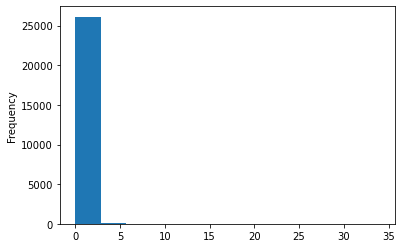

In [320]:
# Create histogram of the other_food column
df_lcf['other_food'].plot.hist(bins = 12)

<AxesSubplot:xlabel='other_food', ylabel='other_food'>

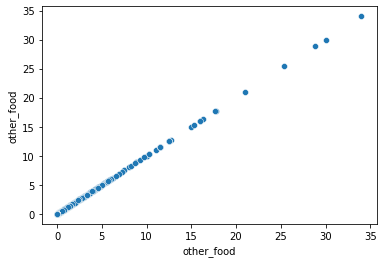

In [321]:
# Create a scatterplot of the other_food column against itself to reveal if there are outliers
sns.scatterplot(x = 'other_food', y = 'other_food', data = df_lcf)

### Income and Expenditure

In [322]:
# Describe the variable 'OECD_disposable_income'
df_lcf['OECD_disposable_income'].describe()

count    26271.000000
mean       429.501670
std        284.749261
min      -1148.750000
25%        247.789077
50%        368.311111
75%        532.626667
max       2496.180000
Name: OECD_disposable_income, dtype: float64

<AxesSubplot:ylabel='Frequency'>

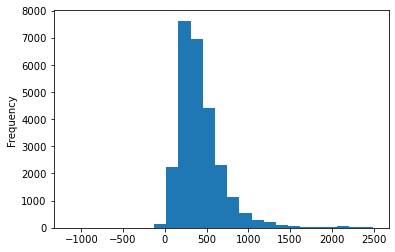

In [323]:
# Create histogram of the OECD_disposable_income column
df_lcf['OECD_disposable_income'].plot.hist(bins = 25)

<AxesSubplot:xlabel='OECD_disposable_income', ylabel='OECD_disposable_income'>

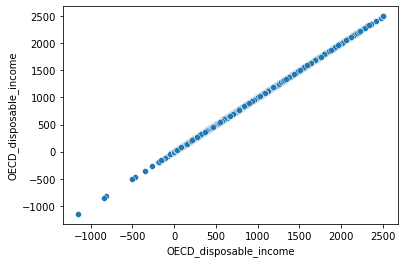

In [324]:
# Create a scatterplot of the OECD_disposable_income column against itself to reveal if there are outliers
sns.scatterplot(x = 'OECD_disposable_income', y = 'OECD_disposable_income', data = df_lcf)

In [325]:
# Describe the variable 'total_income'
df_lcf['total_income'].describe()

count    26271.000000
mean       804.642154
std        543.839764
min          0.000000
25%        394.222621
50%        657.824000
75%       1067.142692
max       2510.291538
Name: total_income, dtype: float64

<AxesSubplot:ylabel='Frequency'>

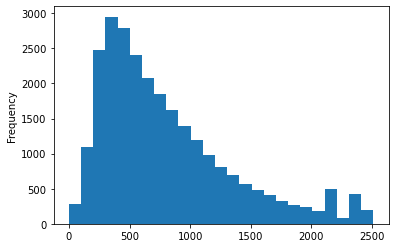

In [326]:
# Create histogram of the total_income column
df_lcf['total_income'].plot.hist(bins = 25)

<AxesSubplot:xlabel='total_income', ylabel='total_income'>

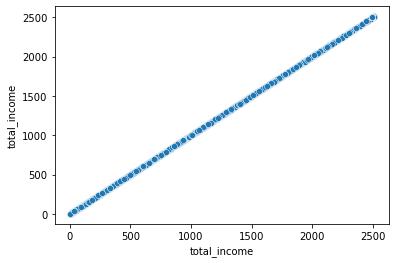

In [327]:
# Create a scatterplot of the total_income column against itself to reveal if there are outliers
sns.scatterplot(x = 'total_income', y = 'total_income', data = df_lcf)

In [328]:
# Describe the variable 'gross_income'
df_lcf['gross_income'].describe()

count    26271.000000
mean       753.615585
std        545.557393
min          0.000000
25%        345.617000
50%        613.572000
75%       1023.360000
max       2496.180000
Name: gross_income, dtype: float64

<AxesSubplot:ylabel='Frequency'>

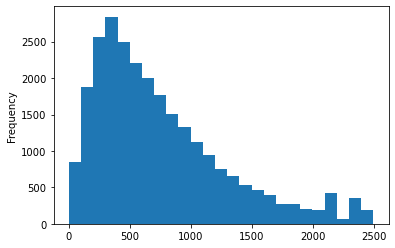

In [329]:
# Create histogram of the gross_income column
df_lcf['gross_income'].plot.hist(bins = 25)

<AxesSubplot:xlabel='gross_income', ylabel='gross_income'>

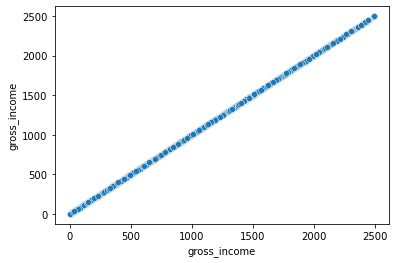

In [330]:
# Create a scatterplot of the gross_income column against itself to reveal if there are outliers
sns.scatterplot(x = 'gross_income', y = 'gross_income', data = df_lcf)

In [331]:
# Describe the variable 'weekly_disposable_income'
df_lcf['weekly_disposable_income'].describe()

count    26271.000000
mean       668.718553
std        426.016876
min      -1268.400800
25%        344.657000
50%        575.880000
75%        895.391000
max       1898.138800
Name: weekly_disposable_income, dtype: float64

<AxesSubplot:ylabel='Frequency'>

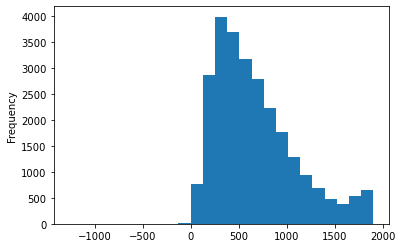

In [332]:
# Create histogram of the weekly_disposable_income column
df_lcf['weekly_disposable_income'].plot.hist(bins = 25)

<AxesSubplot:xlabel='weekly_disposable_income', ylabel='weekly_disposable_income'>

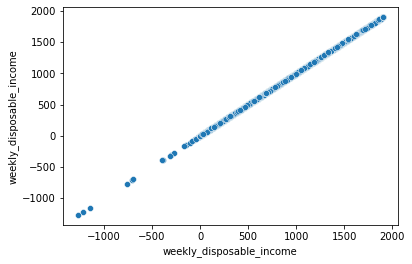

In [333]:
# Create a scatterplot of the weekly_disposable_income column against itself to reveal if there are outliers
sns.scatterplot(x = 'weekly_disposable_income', y = 'weekly_disposable_income', data = df_lcf)

In [334]:
# Describe the variable 'adult_food_cost'
df_lcf['adult_food_cost'].describe()

count    26271.000000
mean        90.258578
std         62.054979
min          0.000000
25%         46.810000
50%         77.935000
75%        120.372500
max       1574.865000
Name: adult_food_cost, dtype: float64

<AxesSubplot:ylabel='Frequency'>

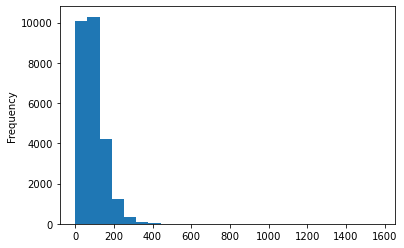

In [335]:
# Create histogram of the adult_food_cost column
df_lcf['adult_food_cost'].plot.hist(bins = 25)

<AxesSubplot:xlabel='adult_food_cost', ylabel='adult_food_cost'>

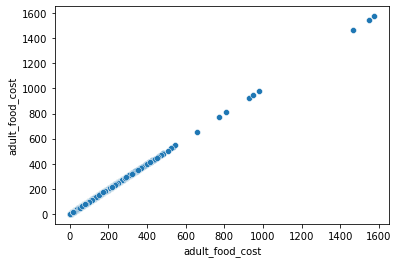

In [336]:
# Create a scatterplot of the adult_food_cost column against itself to reveal if there are outliers
sns.scatterplot(x = 'adult_food_cost', y = 'adult_food_cost', data = df_lcf)

In [337]:
# Contains outliers 
# Find values above the threshold £975 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['adult_food_cost'] > 975].iloc[:,:87]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb
1036,1037,0,0,2,0,1,0,0,0,3,...,917.320,768.160,Investment income,1574.865,0.000,1574.865,2341.630948,0.000,2341.630948,Urban
11682,11683,0,0,0,4,1,0,0,0,5,...,2064.710,1866.260,Wages salaries,977.445,0.000,977.445,2326.052209,0.000,2326.052209,Rural
17486,17487,0,0,1,2,0,0,0,0,3,...,1203.410,991.250,Wages salaries,1467.050,1.750,1468.800,2294.917708,12.735,2307.652708,Urban
20419,20420,1,0,2,1,1,0,0,0,5,...,731.042,731.042,Social sec. benefits,1548.590,23.885,1572.475,2155.689577,25.885,2181.574577,Urban


Remove the three outliers (unique_id's 1037, 17487, 20420) where adult food costs above 1200 and greater than income and the 114 rows with no food costs.

In [338]:
# Describe the variable 'child_food_cost'
df_lcf['child_food_cost'].describe()

count    26271.000000
mean         0.816742
std          3.416002
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         86.020000
Name: child_food_cost, dtype: float64

<AxesSubplot:ylabel='Frequency'>

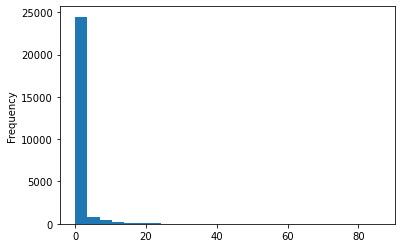

In [339]:
# Create histogram of the child_food_cost column
df_lcf['child_food_cost'].plot.hist(bins = 25)

<AxesSubplot:xlabel='child_food_cost', ylabel='child_food_cost'>

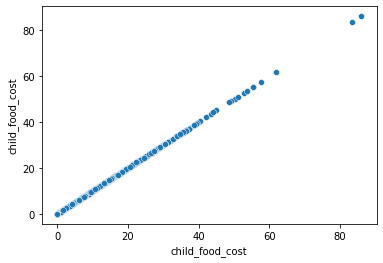

In [340]:
# Create a scatterplot of the child_food_cost column against itself to reveal if there are outliers
sns.scatterplot(x = 'child_food_cost', y = 'child_food_cost', data = df_lcf)

In [341]:
# Contains outliers 
# Find values above the threshold £60 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['child_food_cost'] > 60].iloc[:,:88]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb
17052,17053,0,2,3,2,0,0,0,0,7,...,1485.772,Investment income,267.510,61.965,335.10,877.804212,86.640,960.069212,Rural,nan
19990,19991,0,0,6,2,0,0,0,0,8,...,886.170,Wages salaries,210.335,83.355,293.69,806.966359,83.355,890.321359,nan,Rural
21162,21163,0,0,4,1,0,0,0,0,5,...,510.000,Wages salaries,37.680,86.020,124.95,254.072006,86.020,341.342006,Urban,nan


In [342]:
# Describe the variable 'total_food_cost'
df_lcf['total_food_cost'].describe()

count    26271.000000
mean        91.306127
std         62.963402
min          0.000000
25%         47.102500
50%         78.805000
75%        121.942500
max       1574.865000
Name: total_food_cost, dtype: float64

<AxesSubplot:ylabel='Frequency'>

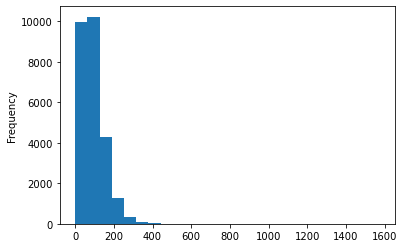

In [343]:
# Create histogram of the total_food_cost column
df_lcf['total_food_cost'].plot.hist(bins = 25)

<AxesSubplot:xlabel='total_food_cost', ylabel='total_food_cost'>

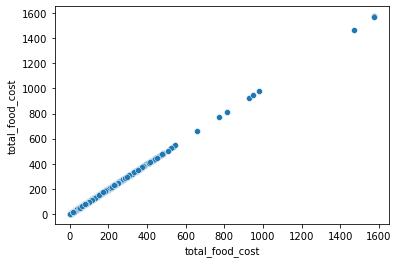

In [344]:
# Create a scatterplot of the total_food_cost column against itself to reveal if there are outliers
sns.scatterplot(x = 'total_food_cost', y = 'total_food_cost', data = df_lcf)

In [345]:
# Contains outliers 
# Find values above the threshold £1000 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['total_food_cost'] > 1000].iloc[:,:85]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure
1036,1037,0,0,2,0,1,0,0,0,3,...,928.123726,1.6,917.320,768.160,Investment income,1574.865,0.000,1574.865,2341.630948,0.000
17486,17487,0,0,1,2,0,0,0,0,3,...,1203.410000,1.8,1203.410,991.250,Wages salaries,1467.050,1.750,1468.800,2294.917708,12.735
20419,20420,1,0,2,1,1,0,0,0,5,...,918.255559,2.6,731.042,731.042,Social sec. benefits,1548.590,23.885,1572.475,2155.689577,25.885


Remove the three outliers identified above (unique_id's 1037, 17487 and 20420) where total food costs (due to adult food costs) above 1200 and greater than income.

In [346]:
# Data without food costs
# Find values where the threshold is £0 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['total_food_cost'] == 0].iloc[:,:87]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb
299,300,0,0,0,0,0,0,0,1,1,...,184.842000,184.842000,Social sec. benefits,0.0,0.0,0.0,58.623497,0.0,58.623497,Urban
1008,1009,1,0,2,1,0,0,0,0,4,...,248.100000,248.100000,Social sec. benefits,0.0,0.0,0.0,60.828062,0.0,60.828062,Urban
1074,1075,0,0,0,2,0,0,0,0,2,...,841.610000,682.200000,Wages salaries,0.0,0.0,0.0,308.382404,0.0,308.382404,Urban
1107,1108,0,0,0,0,0,1,1,0,2,...,378.610000,378.610000,Investment income,0.0,0.0,0.0,1053.235174,0.0,1053.235174,Urban
1349,1350,0,0,0,0,0,0,0,1,1,...,342.752000,307.252000,Social sec. benefits,0.0,0.0,0.0,109.376253,0.0,109.376253,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24394,24395,0,0,0,0,0,0,0,1,1,...,362.611231,362.611231,Social sec. benefits,0.0,0.0,0.0,152.050000,0.0,152.050000,Urban
24467,24468,0,0,0,0,0,0,0,2,2,...,457.877846,457.877846,Social sec. benefits,0.0,0.0,0.0,81.735287,0.0,81.735287,Urban
24742,24743,0,0,0,0,1,0,0,0,1,...,346.612000,346.612000,Social sec. benefits,0.0,0.0,0.0,144.502628,0.0,144.502628,Rural
25549,25550,0,0,0,0,0,0,0,1,1,...,1925.048154,1633.448154,Annuities pensions,0.0,0.0,0.0,817.263293,0.0,817.263293,Urban


In [347]:
# Describe the variable 'adult_total_exp'
df_lcf['adult_total_expenditure'].describe()

count    26271.000000
mean       548.905319
std        423.913687
min       -157.820000
25%        278.663059
50%        453.779147
75%        697.404835
max      10404.181984
Name: adult_total_expenditure, dtype: float64

<AxesSubplot:ylabel='Frequency'>

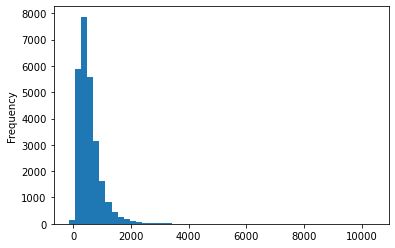

In [348]:
# Create histogram of the adult_total_exp column
df_lcf['adult_total_expenditure'].plot.hist(bins = 50)

<AxesSubplot:xlabel='adult_total_expenditure', ylabel='adult_total_expenditure'>

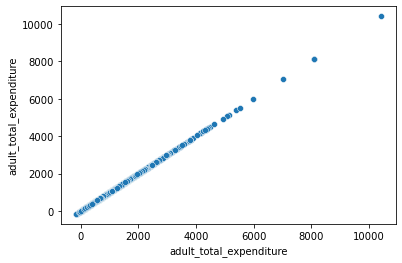

In [349]:
# Create a scatterplot of the adult_total_exp column against itself to reveal if there are outliers
sns.scatterplot(x = 'adult_total_expenditure', y = 'adult_total_expenditure', data = df_lcf)

In [350]:
# Contains outliers 
# Find values above the threshold £7000 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['adult_total_expenditure'] > 7000].iloc[:,:90]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year
4382,4383,0,0,2,1,2,0,0,0,5,...,159.165,3.525,167.090,10404.181984,51.37,10458.951984,Urban,nan,23.432093,2015
13128,13129,0,0,0,5,0,0,0,0,5,...,132.530,0.000,132.530,8102.325000,0.00,8102.325000,Urban,nan,5.720000,2017
13782,13783,0,0,0,2,1,1,0,0,4,...,395.445,0.000,395.445,7035.851554,0.00,7035.851554,Urban,nan,19.905352,2017
17736,17737,0,0,0,1,0,1,1,0,3,...,138.430,0.000,138.430,8109.473568,0.00,8109.473568,Rural,nan,6.920000,2018


Remove Unique_id 4383 which has high total expenditures compared to other households.

In [351]:
# Describe the variable 'child_total_expenditure'
df_lcf['child_total_expenditure'].describe()

count    26271.000000
mean         2.322348
std         11.234547
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        722.935000
Name: child_total_expenditure, dtype: float64

<AxesSubplot:ylabel='Frequency'>

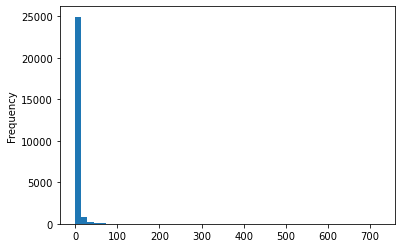

In [352]:
# Create histogram of the child_total_expenditure column
df_lcf['child_total_expenditure'].plot.hist(bins = 50)

<AxesSubplot:xlabel='child_total_expenditure', ylabel='child_total_expenditure'>

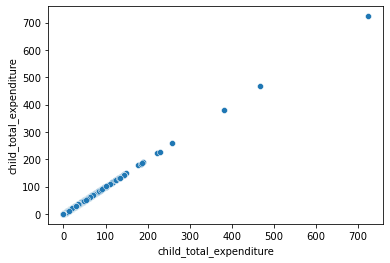

In [353]:
# Create a scatterplot of the child_total_expenditure column against itself to reveal if there are outliers
sns.scatterplot(x = 'child_total_expenditure', y = 'child_total_expenditure', data = df_lcf)

In [354]:
# Contains outliers 
# Find values above the threshold £300 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['child_total_expenditure'] > 300].iloc[:,:96]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year
164,165,0,0,2,1,1,0,0,0,4,...,262.725,3.445,266.17,1492.367531,722.935,2215.302531,Urban,nan,20.182085,2015
14198,14199,0,0,2,1,2,0,0,0,5,...,95.925,31.235,127.16,762.000000,467.735,1211.735000,Rural,nan,13.082735,2017
25157,25158,0,0,2,2,0,0,0,0,4,...,51.485,30.525,96.01,4324.365000,380.800,4719.165000,Urban,nan,28.336197,2019


Remove unique_id 165 where the child total expenditure is much higher.

In [355]:
# Describe the variable 'ftotal_expenditure'
df_lcf['total_expenditure'].describe()

count    26271.000000
mean       550.932781
std        425.126880
min       -157.820000
25%        279.677740
50%        455.852008
75%        701.012332
max      10458.951984
Name: total_expenditure, dtype: float64

Negative total expenditure is possible due to the way FES motoring expenditure is calculated (includes vehicle tax refunds).

<AxesSubplot:ylabel='Frequency'>

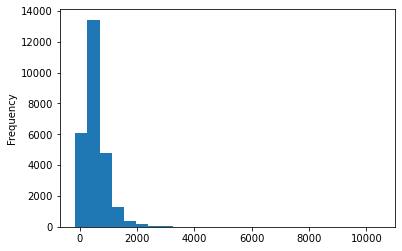

In [356]:
# Create histogram of the total_expenditure column
df_lcf['total_expenditure'].plot.hist(bins = 25)

<AxesSubplot:xlabel='total_expenditure', ylabel='total_expenditure'>

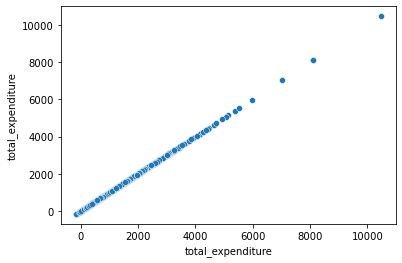

In [357]:
# Create a scatterplot of the total_expenditure column against itself to reveal if there are outliers
sns.scatterplot(x = 'total_expenditure', y = 'total_expenditure', data = df_lcf)

In [358]:
# Contains outliers 
# Find values above the threshold £8000 using the iloc function to show all rows and only first 15 columns
df_lcf.loc[df_lcf['total_expenditure'] > 8000].iloc[:,:96]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year
4382,4383,0,0,2,1,2,0,0,0,5,...,159.165,3.525,167.09,10404.181984,51.37,10458.951984,Urban,nan,23.432093,2015
13128,13129,0,0,0,5,0,0,0,0,5,...,132.530,0.000,132.53,8102.325000,0.00,8102.325000,Urban,nan,5.720000,2017
17736,17737,0,0,0,1,0,1,1,0,3,...,138.430,0.000,138.43,8109.473568,0.00,8109.473568,Rural,nan,6.920000,2018


Unique_id 4383 already identified as an outlier above in adult_total_expenditure.

In [359]:
# Describe the variable 'year'
df_lcf['year'].describe()

count    26271.000000
mean      2017.304328
std          1.468459
min       2015.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2020.000000
Name: year, dtype: float64

<AxesSubplot:ylabel='Frequency'>

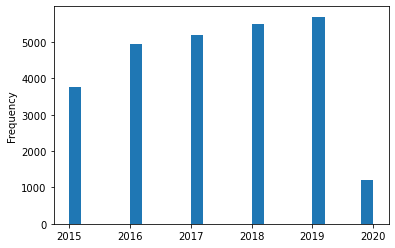

In [360]:
# Create histogram of the year column
df_lcf['year'].plot.hist(bins = 25)

<AxesSubplot:xlabel='year', ylabel='year'>

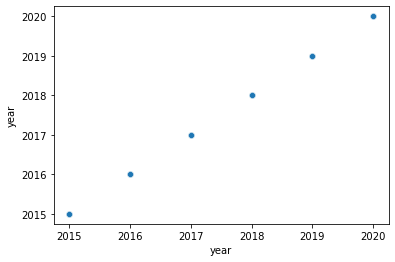

In [361]:
# Create a scatterplot of the year column against itself to reveal if there are outliers
sns.scatterplot(x = 'year', y = 'year', data = df_lcf)

## 05. Removing Outliers

The decision was made only to remove the most extreme values. The food columns contained outliers which were left in the data set. The diaries are checked with the respondents and there could be a number of reasons for a larger than normal spend on certain items during the survey e.g. celebrations, buying in bulk, special offers, etc. When looked at in further detail different households accounted for the outliers in the food categories that were checked. In some cases the household had spent less in other related categories, for example more on beef and nothing on poultry and lamb. Or more on processed foods such as meat and seafood and nothing on fresh or frozen meat and seafood. Removing outliers from each variable would severely impact on the number of food entries within the data set.


In [362]:
# Define function to find outliers using IQR

def IQR_outliers(df):
    
    q1 = df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    
    return outliers

### Remove the six outliers identified in the descriptive statistics section.

In [363]:
# Search for unique_id of outliers and view the first five rows
df_outliers =  df_lcf[df_lcf['unique_id'].isin([1469, 1037, 17487, 20420, 4383, 165])]
df_outliers.head()

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year
164,165,0,0,2,1,1,0,0,0,4,...,262.725,3.445,266.170,1492.367531,722.935,2215.302531,Urban,nan,20.182085,2015
1036,1037,0,0,2,0,1,0,0,0,3,...,1574.865,0.000,1574.865,2341.630948,0.000,2341.630948,Urban,nan,18.053499,2015
1468,1469,0,0,0,1,1,0,0,0,2,...,232.360,0.000,232.360,802.941361,0.000,802.941361,Urban,nan,32.655497,2015
4382,4383,0,0,2,1,2,0,0,0,5,...,159.165,3.525,167.090,10404.181984,51.370,10458.951984,Urban,nan,23.432093,2015
17486,17487,0,0,1,2,0,0,0,0,3,...,1467.050,1.750,1468.800,2294.917708,12.735,2307.652708,Urban,nan,19.512475,2018


In [364]:
outlier_list = [1469, 1037, 17487, 20420, 4383, 165]
df_lcf_clean = df_lcf[~df_lcf.unique_id.isin(outlier_list)]
df_lcf_clean.shape

(26265, 90)

### Remove the entries without a food cost i.e. didn't keep a food diary

In [365]:
# Find values where the threshold is £0 using the iloc function to show all rows and only first 15 columns
df_lcf_clean.loc[df_lcf_clean['total_food_cost'] == 0, 'total_food_cost'] = np.nan

In [366]:
# View the NaN values in the total_food_cost column using iloc to show all the rows
df_lcf_clean_nan = df_lcf_clean[df_lcf_clean['total_food_cost'].isnull() == True]
df_lcf_clean_nan.iloc[:,:86]

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure
299,300,0,0,0,0,0,0,0,1,1,...,1.0,184.842000,184.842000,Social sec. benefits,0.0,0.0,NaN,58.623497,0.0,58.623497
1008,1009,1,0,2,1,0,0,0,0,4,...,1.9,248.100000,248.100000,Social sec. benefits,0.0,0.0,NaN,60.828062,0.0,60.828062
1074,1075,0,0,0,2,0,0,0,0,2,...,1.5,841.610000,682.200000,Wages salaries,0.0,0.0,NaN,308.382404,0.0,308.382404
1107,1108,0,0,0,0,0,1,1,0,2,...,1.5,378.610000,378.610000,Investment income,0.0,0.0,NaN,1053.235174,0.0,1053.235174
1349,1350,0,0,0,0,0,0,0,1,1,...,1.0,342.752000,307.252000,Social sec. benefits,0.0,0.0,NaN,109.376253,0.0,109.376253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24394,24395,0,0,0,0,0,0,0,1,1,...,1.0,362.611231,362.611231,Social sec. benefits,0.0,0.0,NaN,152.050000,0.0,152.050000
24467,24468,0,0,0,0,0,0,0,2,2,...,1.5,457.877846,457.877846,Social sec. benefits,0.0,0.0,NaN,81.735287,0.0,81.735287
24742,24743,0,0,0,0,1,0,0,0,1,...,1.0,346.612000,346.612000,Social sec. benefits,0.0,0.0,NaN,144.502628,0.0,144.502628
25549,25550,0,0,0,0,0,0,0,1,1,...,1.0,1925.048154,1633.448154,Annuities pensions,0.0,0.0,NaN,817.263293,0.0,817.263293


In [367]:
# Drop NaN rows and view the dataframe shape
df_lcf_clean = df_lcf_clean.dropna()
df_lcf_clean.shape

(26151, 90)

In [368]:
# Describe the variable 'oils'
df_lcf_clean['oils'].describe()

count    26151.000000
mean         0.159033
std          0.621413
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         40.725000
Name: oils, dtype: float64

<AxesSubplot:ylabel='Frequency'>

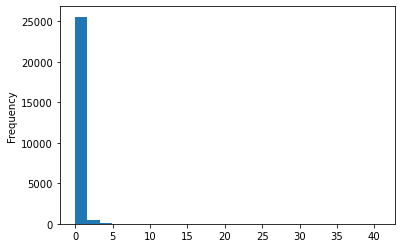

In [369]:
# Create histogram of the oils column
df_lcf_clean['oils'].plot.hist(bins = 25)

<AxesSubplot:xlabel='oils', ylabel='oils'>

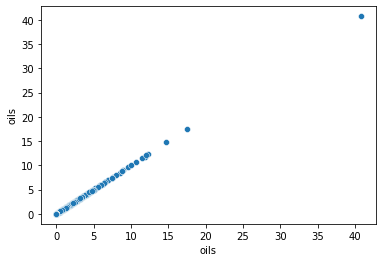

In [370]:
# Create a scatterplot of the oils column against itself to reveal if there are outliers
sns.scatterplot(x = 'oils', y = 'oils', data = df_lcf_clean)

In [371]:
# Describe the variable 'total_food_cost'
df_lcf_clean['total_food_cost'].describe()

count    26151.000000
mean        91.523135
std         60.855715
min          0.300000
25%         47.455000
50%         79.125000
75%        122.172500
max        977.445000
Name: total_food_cost, dtype: float64

In [372]:
# Calculate and view the outliers for adult_food_cost
outliers_adult_food = IQR_outliers(df_lcf_clean['adult_food_cost'])

print('number of outliers: ' + str(len(outliers_adult_food)))
print('max outlier value: ' + str(outliers_adult_food.max()))
print('min outlier value: ' + str(outliers_adult_food.min()))

number of outliers: 721
max outlier value: 977.445
min outlier value: 230.74


In [373]:
# Calculate and view the outliers for child_food_cost
outliers_child_food = IQR_outliers(df_lcf_clean['child_food_cost'])

print('number of outliers: ' + str(len(outliers_child_food)))
print('max outlier value: ' + str(outliers_child_food.max()))
print('min outlier value: ' + str(outliers_child_food.min()))

number of outliers: 3306
max outlier value: 86.02
min outlier value: 0.05


In [374]:
# Calculate and view the outliers for total_food_cost
outliers_food = IQR_outliers(df_lcf_clean['total_food_cost'])

print('number of outliers: ' + str(len(outliers_food)))
print('max outlier value: ' + str(outliers_food.max()))
print('min outlier value: ' + str(outliers_food.min()))

number of outliers: 711
max outlier value: 977.445
min outlier value: 234.34


In [375]:
# Calculate and view the outliers for adult_total_expenditure
outliers_adult_expenditure = IQR_outliers(df_lcf_clean['adult_total_expenditure'])

print('number of outliers: ' + str(len(outliers_adult_expenditure)))
print('max outlier value: ' + str(outliers_adult_expenditure.max()))
print('min outlier value: ' + str(outliers_adult_expenditure.min()))

number of outliers: 1163
max outlier value: 8109.473567776662
min outlier value: 1324.8906761565836


In [376]:
# Calculate and view the outliers for child_total_expenditure
outliers_child_expenditure = IQR_outliers(df_lcf_clean['child_total_expenditure'])

print('number of outliers: ' + str(len(outliers_child_expenditure)))
print('max outlier value: ' + str(outliers_child_expenditure.max()))
print('min outlier value: ' + str(outliers_child_expenditure.min()))

number of outliers: 3689
max outlier value: 467.735
min outlier value: 0.05


In [377]:
# Describe the variable 'total_expenditure'
df_lcf_clean['total_expenditure'].describe()

count    26151.000000
mean       551.035763
std        420.125538
min       -157.820000
25%        280.459882
50%        456.576086
75%        701.236384
max       8109.473568
Name: total_expenditure, dtype: float64

In [378]:
# Calculate and view the outliers for total_expenditure
outliers_expenditure = IQR_outliers(df_lcf_clean['total_expenditure'])

print('number of outliers: ' + str(len(outliers_expenditure)))
print('max outlier value: ' + str(outliers_expenditure.max()))
print('min outlier value: ' + str(outliers_expenditure.min()))

number of outliers: 1152
max outlier value: 8109.473567776662
min outlier value: 1332.75816803775


In [379]:
# View the dataframe information
df_lcf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26151 entries, 0 to 26270
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_id                 26151 non-null  int64  
 1   children_0-2              26151 non-null  int64  
 2   children_2-5              26151 non-null  int64  
 3   children_5-18             26151 non-null  int64  
 4   adults_18-45              26151 non-null  int64  
 5   adults_45-60              26151 non-null  int64  
 6   adults_60-65              26151 non-null  int64  
 7   adults_65-70              26151 non-null  int64  
 8   adults_70+                26151 non-null  int64  
 9   no_people                 26151 non-null  int64  
 10  household_type            26151 non-null  object 
 11  quarter                   26151 non-null  object 
 12  rice                      26151 non-null  float64
 13  bread                     26151 non-null  float64
 14  buns_b

## 06. Basic descriptive statistics on cleaned dataframe 

In [380]:
# View the dataframe shape and display all columns
pd.set_option('display.max_columns', None)
df_lcf_clean.describe()

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,rice,bread,buns_biscuits,pasta,cakes_puddings,pastry,other_bread_cereal,beef,pork,lamb,poultry,sausages,bacon_ham,offal_pate,processed_meat,meat,fish,seafood,preserved_seafood,processed_fish,whole_milk,low_milk,preserved_milk,yoghurt,cheese,other_milk,eggs,butter,margarine,peanut_butter,olive_oil,oils,animal_fats,citrus_fruit,bananas,apples,pears,stone_fruits,berries,fruits,dried_fruit_nuts,preserved_fruit,fresh_veg,cabbage,veg,root_veg,dried_veg,preserved_veg,potatoes,tuber_veg,sugar,jam,chocolate,confectionary,ice_cream,sugar_prod,sauces,condiments,misc,other_food,case_no,OECD_disposable_income,total_income,OECD_scale,gross_income,weekly_disposable_income,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,quarterly_weight,year
count,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.00000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000,26151.000000
mean,13131.897021,0.060151,0.092272,0.371573,0.733318,0.481320,0.155023,0.151696,0.305495,2.350847,0.437029,2.570203,2.353304,0.428362,1.568404,0.897023,2.428604,2.029461,0.584037,0.583879,2.278862,0.890121,0.900216,0.104685,5.481053,0.018085,0.927903,0.327695,0.326768,1.285605,0.424235,1.527280,0.245600,1.184426,2.027369,1.082391,0.714551,0.479044,0.503813,0.067668,0.144734,0.159033,0.023822,0.603391,0.499086,0.573196,0.149764,0.571004,1.536902,0.453360,0.820714,0.154636,0.942923,0.387965,1.47174,1.416869,0.055932,1.661259,0.798774,1.717643,0.206309,0.312911,2.115073,0.803077,0.688152,0.169517,1.248308,0.230094,1.068948,0.066124,2758.209590,429.514696,805.298975,1.591086,754.230883,669.269467,90.472194,0.819243,91.523135,549.030212,2.301919,551.035763,20.823431,2017.303774
std,7585.540938,0.246612,0.318958,0.773768,0.903322,0.723773,0.426087,0.424905,0.604774,1.243445,1.313131,2.255431,2.560194,0.846987,2.526661,1.637741,2.566464,3.704961,1.556297,2.268478,3.507346,1.536030,1.579435,0.509264,5.876640,0.355225,2.427987,1.291643,1.124975,2.081918,1.073087,1.810294,1.678979,1.715237,2.441467,1.657406,0.925434,0.983657,0.888589,0.336051,0.718983,0.621413,0.169143,0.992403,0.628419,0.953140,0.429718,1.272428,2.353098,1.078224,1.941240,0.509200,1.382427,0.658755,1.76643,1.894744,0.343027,2.377139,1.005277,1.997629,0.537241,0.880850,3.523582,1.502670,1.390590,0.668270,1.605476,0.713882,2.650240,0.658164,1606.395338,284.205791,543.609304,0.511523,545.344854,425.786732,59.939459,3.420340,60.855715,419.034065,10.334151,420.125538,8.748237,1.468794
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [381]:
# View the dataframe information
df_lcf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26151 entries, 0 to 26270
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_id                 26151 non-null  int64  
 1   children_0-2              26151 non-null  int64  
 2   children_2-5              26151 non-null  int64  
 3   children_5-18             26151 non-null  int64  
 4   adults_18-45              26151 non-null  int64  
 5   adults_45-60              26151 non-null  int64  
 6   adults_60-65              26151 non-null  int64  
 7   adults_65-70              26151 non-null  int64  
 8   adults_70+                26151 non-null  int64  
 9   no_people                 26151 non-null  int64  
 10  household_type            26151 non-null  object 
 11  quarter                   26151 non-null  object 
 12  rice                      26151 non-null  float64
 13  bread                     26151 non-null  float64
 14  buns_b

## 07. Exporting Cleaned Dataframe

## 07. Exporting Cleaned Dataframe

In [382]:
# Export the dataframe into the Prepared_Data folder as lcf.csv and lcf.pkl
df_lcf_clean.to_csv(os.path.join(path, '02_Data','02_2_Prepared_Data', 'lcf_clean.csv'))
df_lcf_clean.to_pickle(os.path.join(path, '02_Data','02_2_Prepared_Data', 'lcf_clean.pkl'))